# [Cardiovascular Disease](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset) Part 1 – EDA

---

**Заказчик**

Для внутреннего (Яндекс.Практикум) соревнования [Heart diseases prediction](https://www.kaggle.com/competitions/yap15-heart-diseases-predictions).

---

**Входные данные**: параметры обследованных пациентов; данные изначально разделены на обучающий и тестовый наборы.

---

**Цель**

Predict risk of heart diseases from patient lifestyle information.  
Целевая метрика – ROC-AUC-score.

---

**Задачи:**  

- провести исследовательский анализ данных;
- исправить ошибки в данных;
- подготовить данные для feature engineering.

**Some explanations**

---

Permanent data tables named like: **data**.  

Temporary data tables named like: **df**.  

---

Intermediate conclusions are highlighted as follows:

> Intermediate conclusion.

---

The code of the cells are as independent as possible from each other in order to freely manipulate the cells.

---

## Intro

Features:

|                      Feature Full Name       |  Feature origin   | Feature Name |                    Data Type (units)       |
|:---------------------------------------------|:-------------------|:-----------|:--------------------------------------------|
|                      Age                      |  Objective Feature  |     age     |                    int (days)                    |
| Height                                        | Objective Feature   | height      | int (cm)                                         |
| Weight                                        | Objective Feature   | weight      | float (kg)                                       |
| Gender                                        | Objective Feature   | gender      | categorical code                                 |
| Systolic blood pressure                       | Examination Feature | ap_hi       | int                                              |
| Diastolic blood pressure                      | Examination Feature | ap_lo       | int                                              |
| Cholesterol                                   | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose                                       | Examination Feature | gluc        | 1: normal, 2: above normal, 3: well above normal |
| Smoking                                       | Subjective Feature  | smoke       | binary                                           |
| Alcohol intake                                | Subjective Feature  | alco        | binary                                           |
| Physical activity                             | Subjective Feature  | active      | binary                                           |
| Presence or absence of cardiovascular disease | Target Variable     | cardio      | binary                                           |

All of the dataset values were collected at the moment of medical examination. 

---

## Initial

### Imports

In [1]:
import pandas as pd
import numpy as np

import os
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go
import plotly.io as pio

### Constants

In [2]:
PATH_LOCAL = 'datasets/'                                              # local path to data
PATH_REMOTE = '/kaggle/input/yap15-heart-diseases-predictions/'       # remote path to data

CR = '\n'                                                             # new line
RANDOM_STATE = RS = 88                                                # random_state

### Functions

In [3]:
def custom_read_csv(file_name, separator=','):
    """
    чтение датасета в формате CSV:
      сначала из локального хранилища;
      при неудаче — из удаленного хранилища Kaggle.
    """

    path_local = f'{PATH_LOCAL}{file_name}'
    path_remote = f'{PATH_REMOTE}{file_name}'
    
    if os.path.exists(path_local):
        return pd.read_csv(path_local, sep=separator)

    elif os.path.exists(path_remote):
        return pd.read_csv(path_remote, sep=separator)

    else:
        print(f'File "{file_name}" not found at the specified path ')

In [4]:
def df_name(df):
    """
    table name determination
    """
    return [name for name in globals() if globals()[name] is df][0]

In [5]:
def basic_info(df: pd.DataFrame, sample_type='sample', samples=5, describe='all'):
    """
    first info about dataframe: info(), sample()/head()/tail(), describe()
    """
    
    # title (name of dataframe)
    
    print(f'\n\ndataframe {f.BOLD}{df_name(df)}{f.END}', '≋'*30)


    # method info()
    
    print('\n\n--- method info() ---\n')
    print(df.info())

    
    # several random records
    
    print(f'\n\n--- method {sample_type}({samples}) ---')
    
    if sample_type == 'sample':
        display(df.sample(samples))
    elif sample_type == 'head':
        display(df.head(samples))
    elif sample_type == 'tail':
        display(df.tail(samples))
    else:
        print(f'{sample_type} – invalid value for parameter "sample_type" ')
    
    
    # method describe()
    
    print(f'\n\n--- method describe({describe}) ---')
    
    if describe=='all' or describe=='numeric':
        try:
            display(df.describe(include=np.number))
        except ValueError:
            pass

    if describe=='all' or describe=='categorical':
        try:
            display(df.describe(exclude=np.number).T)
        except ValueError:
            pass
    
    if describe not in ['numeric','categorical','all']:
        print(f'{describe} – invalid value for parameter "describe" ')

### Settings

In [6]:
# text styles
class f:
    BOLD = "\033[1m"
    ITALIC = "\033[3m"
    END = "\033[0m"

In [7]:
# defaults for charts

# Matplotlib, Seaborn
PLOT_DPI = 150  # dpi for charts rendering 
sns.set_style('whitegrid', {'axes.facecolor': '0.98', 'grid.color': '0.9', 'axes.edgecolor': '1.0'})
plt.rc(
       'axes',
       labelweight='bold',
       titlesize=16,
       titlepad=10,
      )

# Plotly Graph_Objects
pio.templates['my_theme'] = go.layout.Template(
                                               layout_autosize=True,
                                               # width=900,
                                               layout_height=200,
                                               layout_legend_orientation="h",
                                               layout_margin=dict(t=40, b=40),         # (l=0, r=0, b=0, t=0, pad=0)
                                               layout_template='seaborn',
                                              )
pio.templates.default = 'my_theme'

# colors, color schemes
CMAP_SYMMETRIC = LinearSegmentedColormap.from_list('', ['steelblue', 'aliceblue', 'steelblue'])

In [8]:
# Pandas defaults
pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 500
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.3f}'.format
pd.options.display.colheader_justify = 'left'

In [9]:
# others
warnings.filterwarnings('ignore')

---

## Read and Check data

### Read data

In [10]:
# train data
data_train = custom_read_csv('train.csv')

# test data
data_test = custom_read_csv('test.csv')

### First look at data

In [11]:
basic_info(data_train)
basic_info(data_test)



dataframe data_train ≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋


--- method info() ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None


--- method sample(5) ---


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
229,316,20259,2,169,65.000,130,80,1,1,0,0,0,0
31841,45473,21784,1,158,76.000,120,80,1,1,0,0,1,0
63459,90608,18204,1,169,68.000,100,70,2,1,0,0,1,0
6626,9446,19090,1,160,88.000,130,90,2,2,0,0,1,1
9677,13801,22024,1,168,65.000,120,80,1,1,0,0,1,1




--- method describe(all) ---


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000,70000.000,70000.000,70000.000,70000.000,70000.000,70000.000,70000.000,70000.000,70000.000,70000.000,70000.000,70000.000
mean,49972.420,19468.866,1.350,164.359,74.206,128.817,96.630,1.367,1.226,0.088,0.054,0.804,0.500
std,28851.302,2467.252,0.477,8.210,14.396,154.011,188.473,0.680,0.572,0.283,0.226,0.397,0.500
min,0.000,10798.000,1.000,55.000,10.000,-150.000,-70.000,1.000,1.000,0.000,0.000,0.000,0.000
25%,25006.750,17664.000,1.000,159.000,65.000,120.000,80.000,1.000,1.000,0.000,0.000,1.000,0.000
50%,50001.500,19703.000,1.000,165.000,72.000,120.000,80.000,1.000,1.000,0.000,0.000,1.000,0.000
75%,74889.250,21327.000,2.000,170.000,82.000,140.000,90.000,2.000,1.000,0.000,0.000,1.000,1.000
max,99999.000,23713.000,2.000,250.000,200.000,16020.000,11000.000,3.000,3.000,1.000,1.000,1.000,1.000




dataframe data_test ≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋


--- method info() ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           30000 non-null  int64  
 1   age          30000 non-null  int64  
 2   gender       30000 non-null  int64  
 3   height       30000 non-null  int64  
 4   weight       30000 non-null  float64
 5   ap_hi        30000 non-null  int64  
 6   ap_lo        30000 non-null  int64  
 7   cholesterol  30000 non-null  int64  
 8   gluc         30000 non-null  int64  
 9   smoke        30000 non-null  int64  
 10  alco         30000 non-null  int64  
 11  active       30000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 2.7 MB
None


--- method sample(5) ---


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
2281,7695,22057,2,168,80.000,130,90,1,1,1,0,1
26805,89457,22358,1,160,58.000,120,80,1,1,0,0,1
13687,45662,20927,1,158,70.000,110,70,1,1,0,0,1
7892,26338,20316,2,174,68.000,130,80,3,1,0,0,1
28681,95759,21738,2,160,59.000,120,80,1,1,0,0,1




--- method describe(all) ---


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
count,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000
mean,50062.687,19455.528,1.354,164.322,74.121,130.271,95.689,1.368,1.223,0.089,0.055,0.806
std,28906.167,2477.841,0.478,8.214,14.342,212.501,163.853,0.679,0.566,0.284,0.228,0.396
min,5.000,8865.000,1.000,50.000,10.000,-130.000,-90.000,1.000,1.000,0.000,0.000,0.000
25%,24983.250,17658.000,1.000,159.000,65.000,120.000,80.000,1.000,1.000,0.000,0.000,1.000
50%,49995.500,19694.000,1.000,165.000,72.000,120.000,80.000,1.000,1.000,0.000,0.000,1.000
75%,75232.250,21320.000,2.000,170.000,82.000,140.000,90.000,2.000,1.000,0.000,0.000,1.000
max,99997.000,23705.000,2.000,198.000,183.000,16020.000,9100.000,3.000,3.000,1.000,1.000,1.000


> There are no NaNs.

### Duplicates in data

In [12]:
data_train.duplicated().sum(), data_test.duplicated().sum()

(0, 0)

In [13]:
data_train[['id']].duplicated().sum(), data_test[['id']].duplicated().sum()

(0, 0)

> There are no duplicates in the data.

### Target balance

In [14]:
data_train.groupby('cardio').size()

cardio
0    35021
1    34979
dtype: int64

> The data is balanced by target.

### Strange spaces in range of age

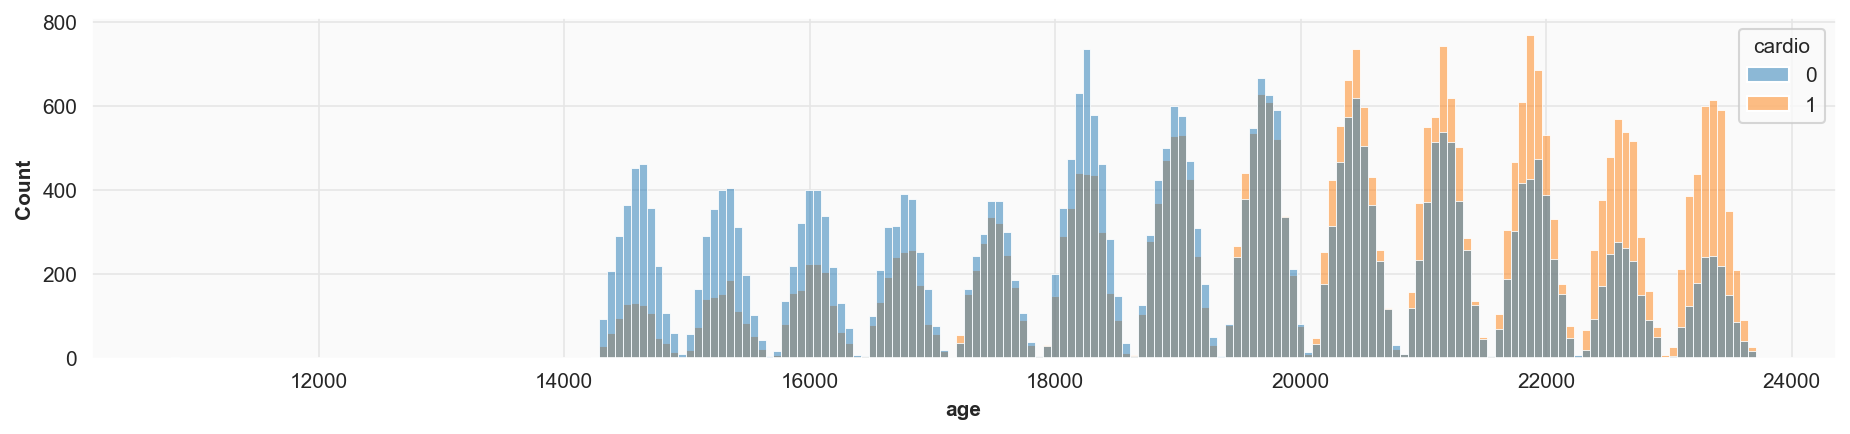

In [15]:
fig, ax = plt.subplots(figsize=(15,3), dpi=PLOT_DPI)
sns.histplot(data=data_train, x='age', hue='cardio', bins=200);

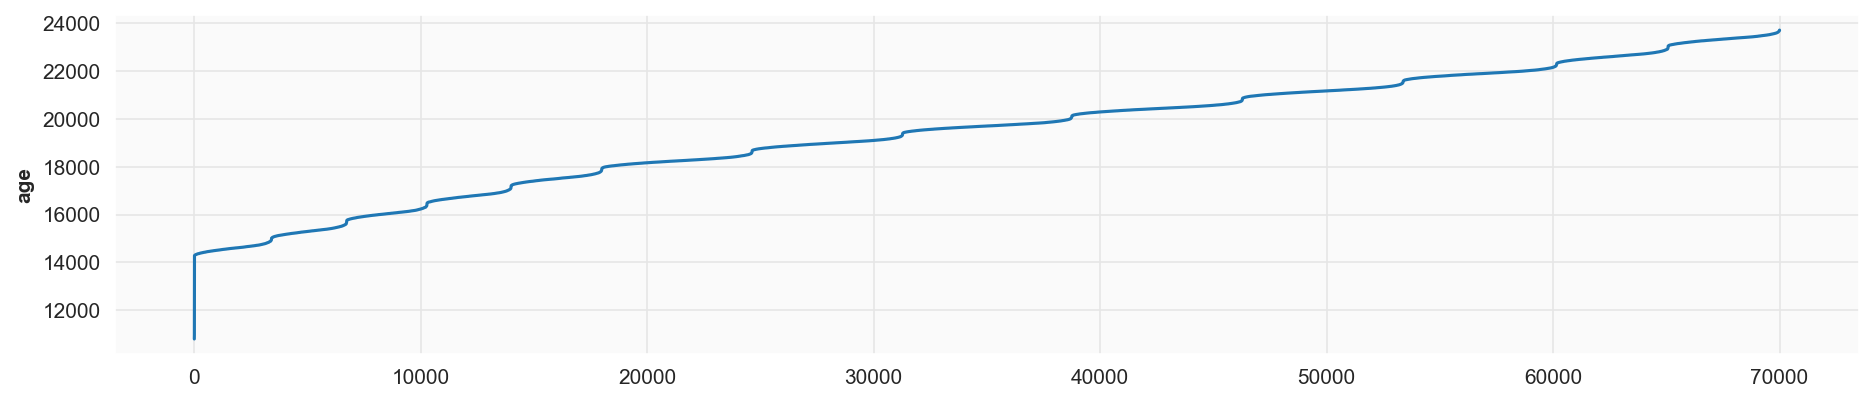

In [16]:
df = data_train.sort_values('age').reset_index()

fig, ax = plt.subplots(figsize=(15,3), dpi=PLOT_DPI)
sns.lineplot(x=df.index, y=df.age);

---

## Minor improvements

### Drop `id`

In [17]:
data_train = data_train.drop('id', axis=1)

### Convert `gender` values to `0`/`1`

In [18]:
data_train.gender = data_train.gender.map({1:1,2:0})
data_test.gender = data_test.gender.map({1:1,2:0})

### Convert `age` from days to years

There are 365.25 days on average in a year. Age rounded to whole year.

In [19]:
data_train.age = (data_train.age / 365.25).round().astype('int8')
data_test.age = (data_test.age / 365.25).round().astype('int8')

### Convert `weight` type to integer

In [20]:
data_train.weight = data_train.weight.round().astype('int16')
data_test.weight = data_test.weight.round().astype('int16')

---

## Feature exploration for errors and outliers

### Графики разброса для признаков


Графики разброса для признаков (train и test)



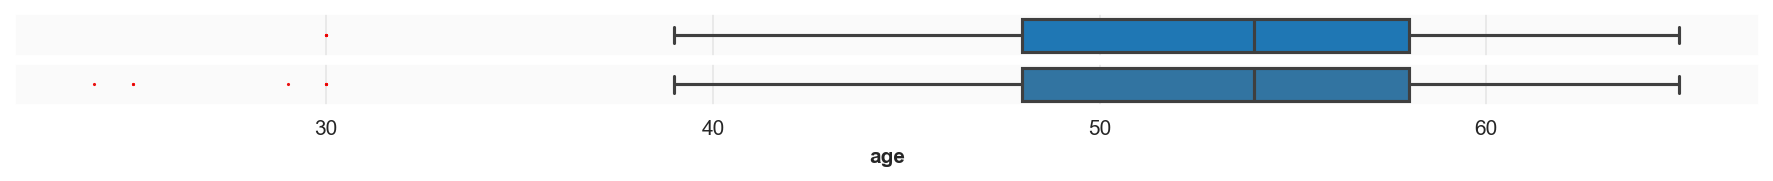

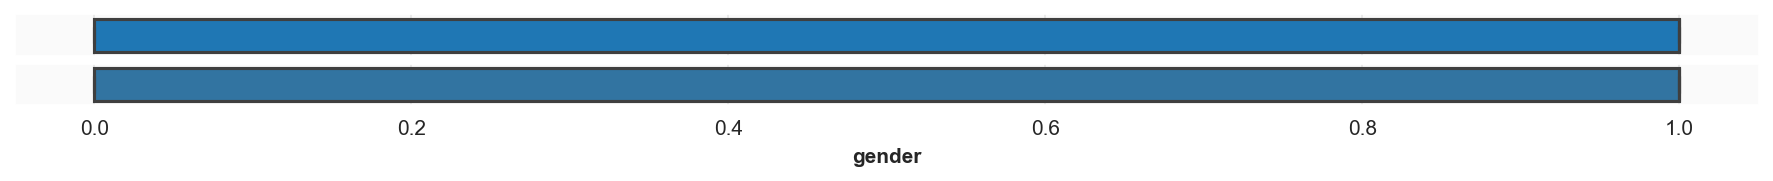

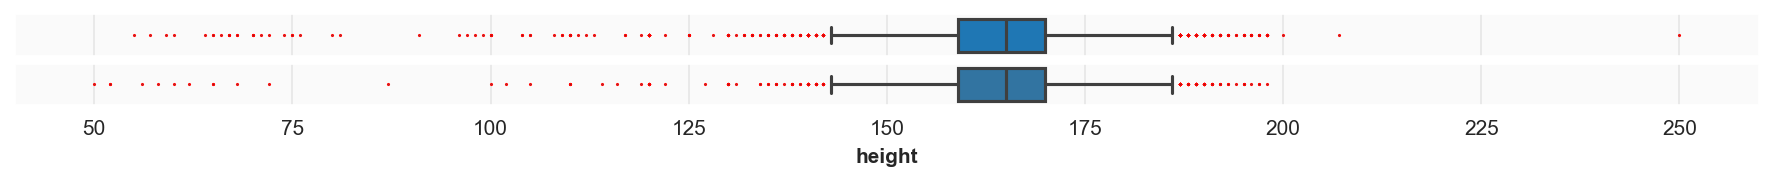

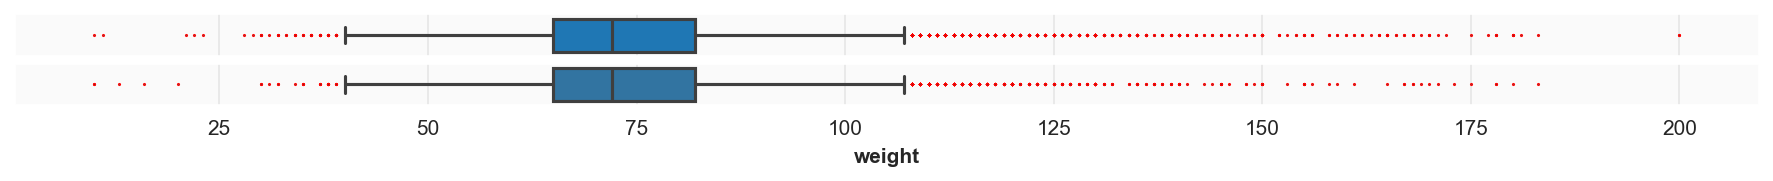

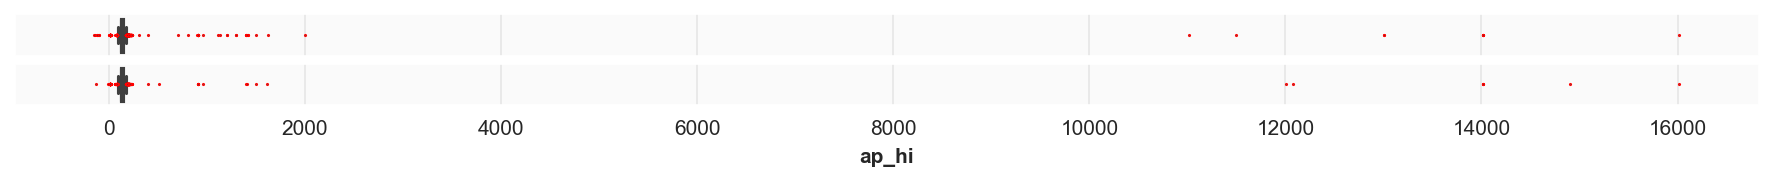

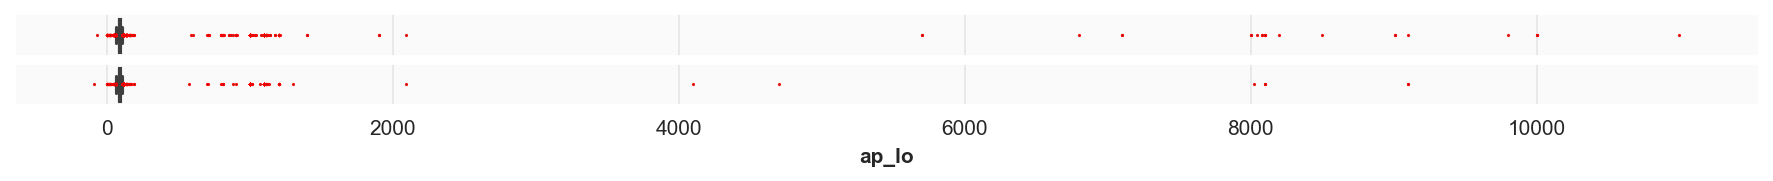

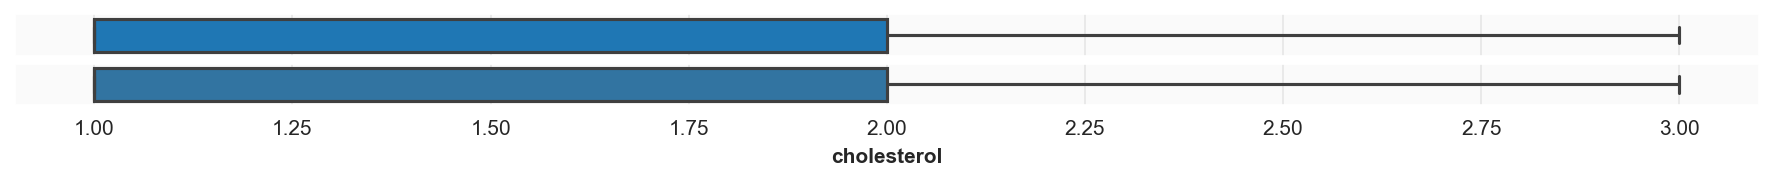

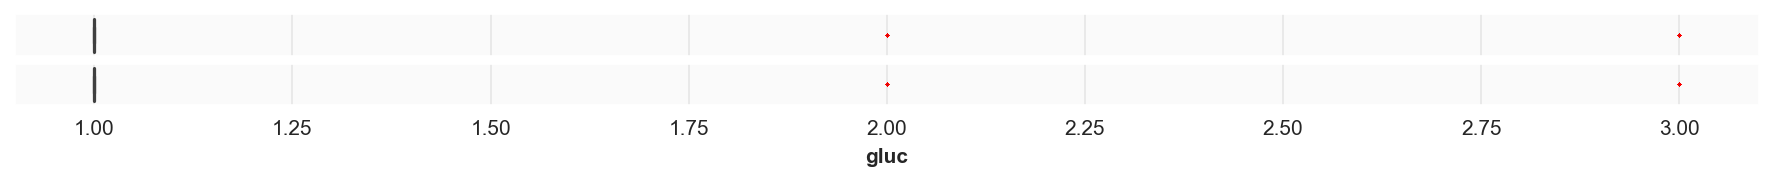

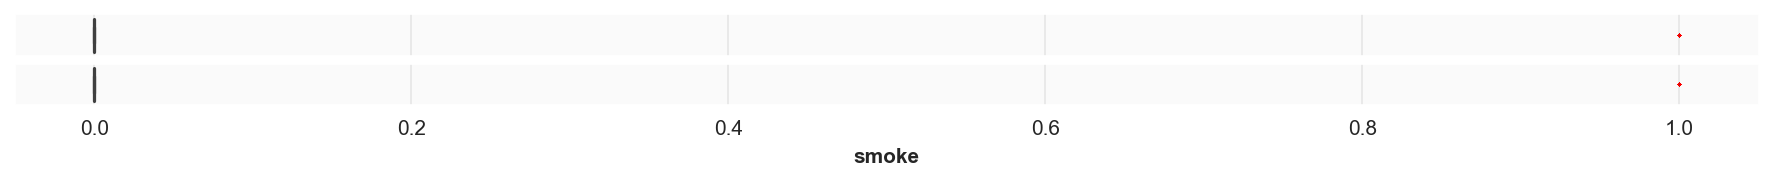

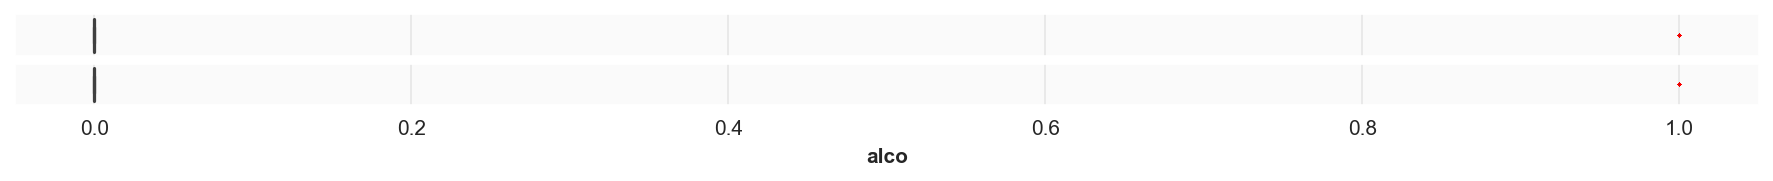

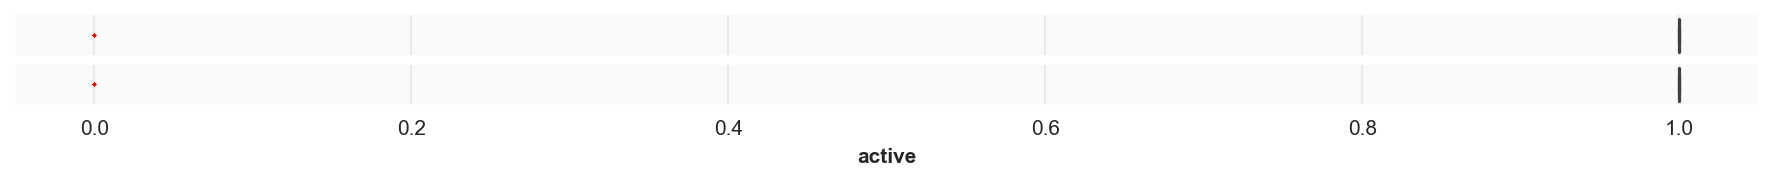

In [21]:
print(f'{CR}Графики разброса для признаков (train и test){CR}')
for feature in data_test.drop('id',axis=1).columns.to_list():
    fig, ax = plt.subplots(figsize=(15,0.8), dpi=PLOT_DPI, nrows=2, ncols=1, sharex=True)
    sns.boxplot(data=data_train, x=feature, flierprops={'marker':'.','markeredgecolor':'red','markersize':1}, saturation=1, ax=ax[0])
    sns.boxplot(data=data_test, x=feature, flierprops={'marker':'.','markeredgecolor':'red','markersize':1}, ax=ax[1])
    ax[0].set_xlabel('');

> Для большинства признаков явно выраженных проблем нет.  
> Распределения обучающей и тестовой выборок достаточно похожи.

> Признаки, которые необходимо дополнительно обработать:
> - **age**: крайне небольшое количество выбросов – можно удалить;
> - **height**: небольшое количество выбросов – можно удалить либо сделать clip;
> - **weight**: небольшое количество выбросов – можно удалить либо сделать clip;
> - **ap_hi** и **ap_lo**: небольшое количество выбросов – можно попробовать исправить ошибки, затем проанализировать заново.

### Коррекция ошибок

#### `ap_hi`

ap_hi, отрицательные значения

In [22]:
# отрицательные значения делаем положительными

data_train.ap_hi = data_train.ap_hi.abs()
data_test.ap_hi = data_test.ap_hi.abs()

> Все отрицательные значения исправили, сделав положительными.

ap_hi, максимальные значения

In [23]:
# количество значений больше 300
data_train[data_train.ap_hi > 300].shape[0], data_test[data_test.ap_hi > 300].shape[0]

(40, 19)

In [24]:
# # раскомментировать, чтобы изучить результат
# # значения больше 300
# data_train[data_train.ap_hi > 300].sort_values('ap_hi', ascending=False)

In [25]:
# # раскомментировать, чтобы изучить результат
# # значения больше 300
# data_test[data_test.ap_hi > 300].sort_values('ap_hi', ascending=False)

In [26]:
# значения больше 3000 делим на 100

idx = data_train[data_train.ap_hi > 3000].index
data_train.loc[idx, 'ap_hi'] = round(data_train.loc[idx, 'ap_hi'] / 100)

idx = data_test[data_test.ap_hi > 3000].index
data_test.loc[idx, 'ap_hi'] = round(data_test.loc[idx, 'ap_hi'] / 100)

In [27]:
# значения больше 300 делим на 10

idx = data_train[data_train.ap_hi > 300].index
data_train.loc[idx, 'ap_hi'] = round(data_train.loc[idx, 'ap_hi'] / 10)

idx = data_test[data_test.ap_hi > 300].index
data_test.loc[idx, 'ap_hi'] = round(data_test.loc[idx, 'ap_hi'] / 10)

> Если больше 3000 – делим на 100.  
> Если больше 300 – делим на 10.  

> Происхождение некоторых ошибок, как и их исправление, очевидно. Но поскольку таких ошибок крайне мало, проще не заморачиваться и удалить.

ap_hi, минимальные значения

In [28]:
# всего значений меньше 50
data_train[data_train.ap_hi < 50].shape[0], data_test[data_test.ap_hi < 50].shape[0]

(183, 81)

In [29]:
# # раскомментировать, чтобы изучить результат
# # значения меньше 50
# data_train[data_train.ap_hi < 50].sort_values('ap_hi', ascending=False)

In [30]:
# # раскомментировать, чтобы изучить результат
# # значения меньше 50
# data_test[data_test.ap_hi < 50].sort_values('ap_hi', ascending=False)

In [31]:
# значения от 10 до 24 умножаем на 10

idx = data_train[(data_train.ap_hi >= 6) & (data_train.ap_hi <= 30)].index
data_train.loc[idx, 'ap_hi'] = data_train.loc[idx, 'ap_hi'] * 10

idx = data_test[(data_test.ap_hi >= 6) & (data_test.ap_hi <= 30)].index
data_test.loc[idx, 'ap_hi'] = data_test.loc[idx, 'ap_hi'] * 10

In [32]:
# # раскомментировать, чтобы изучить результат
# # значения меньше 50
# data_train[data_train.ap_hi < 50].sort_values('ap_hi', ascending=False)

In [33]:
# # раскомментировать, чтобы изучить результат
# # значения меньше 50
# data_test[data_test.ap_hi < 50].sort_values('ap_hi', ascending=False)

In [34]:
# удаляем оставшиеся значения меньше 50
# в тестовой выборке данные удалять нельзя! исправляем вручную

data_train = data_train[~(data_train.ap_hi < 50)]

data_test.loc[1929,'ap_hi'], data_test.loc[1929,'ap_lo'] = 190, 100
data_test.loc[12852,'ap_hi'], data_test.loc[12852,'ap_lo'] = 130, 90
data_test.loc[15510,'ap_hi'], data_test.loc[15510,'ap_lo'] = 120, 80

> Значения 6–30 исправили, умножив на 10.
>
> Оставшиеся значения меньше 50 в обучащей выборке удалены (их было всего 3).  
> Значения меньше 50 в тестовой выборке заменены на 50 (пороговое значение).

#### `ap_lo`

ap_lo, отрицательные значения

In [35]:
# отрицательные значения делаем положительными

data_train.ap_lo = data_train.ap_lo.abs()
data_test.ap_lo = data_test.ap_lo.abs()

> Все отрицательные значения исправили, сделав положительными.

ap_lo, максимальные значения

In [36]:
# количеество значений больше 200
data_train[data_train.ap_lo > 200].shape[0], data_test[data_test.ap_lo > 200].shape[0]

(951, 400)

In [37]:
# # раскомментировать, чтобы изучить результат
# # значения больше 200
# display(data_train[data_train.ap_lo > 200].sort_values('ap_lo', ascending=False).head(10))
# display(data_train[data_train.ap_lo > 200].sort_values('ap_lo', ascending=False).tail(10))

In [38]:
# # раскомментировать, чтобы изучить результат
# # значения больше 200
# display(data_test[data_test.ap_lo > 200].sort_values('ap_lo', ascending=False).head(10))
# display(data_test[data_test.ap_lo > 200].sort_values('ap_lo', ascending=False).tail(10))

In [39]:
# значения больше 2000 делим на 100

idx = data_train[data_train.ap_lo > 2000].index
data_train.loc[idx, 'ap_lo'] = round(data_train.loc[idx, 'ap_lo'] / 100)

idx = data_test[data_test.ap_lo > 2000].index
data_test.loc[idx, 'ap_lo'] = round(data_test.loc[idx, 'ap_lo'] / 100)

In [40]:
# значения больше 200 делим на 10

idx = data_train[data_train.ap_lo > 200].index
data_train.loc[idx, 'ap_lo'] = round(data_train.loc[idx, 'ap_lo'] / 10)

idx = data_test[data_test.ap_lo > 200].index
data_test.loc[idx, 'ap_lo'] = round(data_test.loc[idx, 'ap_lo'] / 10)

> Если больше 2000 – делим на 100.  
> Если больше 200 – делим на 10.

ap_lo, минимальные значения

In [41]:
# всего значений меньше 20
data_train[data_train.ap_lo < 20].shape[0], data_test[data_test.ap_lo < 20].shape[0]

(36, 19)

In [42]:
# # раскомментировать, чтобы изучить результат
# # значения меньше 20
# data_train[data_train.ap_lo < 20].sort_values('ap_lo', ascending=False)

In [43]:
# # раскомментировать, чтобы изучить результат
# # значения меньше 20
# data_test[data_test.ap_lo < 20].sort_values('ap_lo', ascending=False)

In [44]:
# значения от 3 до 10 умножаем на 10

idx = data_train[(data_train.ap_lo >= 3) & (data_train.ap_lo <= 20)].index
data_train.loc[idx, 'ap_lo'] = data_train.loc[idx, 'ap_lo'] * 10

idx = data_test[(data_test.ap_lo >= 3) & (data_test.ap_lo <= 20)].index
data_test.loc[idx, 'ap_lo'] = data_test.loc[idx, 'ap_lo'] * 10

In [45]:
# замена неисправимых значений на средние с учетом признаков gender, age и weight

# временное поле ap_lo_mean – среднее с учетом признаков gender, age и weight
data_train['ap_lo_mean'] = data_train.groupby(['gender','age','weight']).ap_lo.transform('mean').round()

# data_train: фильтр на значения, замена ap_lo на ap_lo_mean
idx = data_train[data_train.ap_lo < 3].index
data_train.loc[idx, 'ap_lo'] = data_train.loc[idx, 'ap_lo_mean']

# data_test: фильтр на значения, присоединение ap_lo_mean, замена ap_lo на ap_lo_mean
idx = data_test[data_test.ap_lo < 3].index
data_test = data_test.merge(data_train[['gender','age','weight','ap_lo_mean']].drop_duplicates(), on=['gender','age','weight'], how='left')
data_test.loc[idx, 'ap_lo'] = data_test.loc[idx, 'ap_lo_mean']

# удаление временного поля ap_lo_mean
data_train = data_train.drop('ap_lo_mean', axis=1)
data_test = data_test.drop('ap_lo_mean', axis=1)

> Значения от 3 до 20 исправили, умножив на 10.
>
> Неисправимые значения заменены на средние с учетом gender, age и weight.

#### `ap_hi` и `ap_lo` совместно

ap_hi меньше ap_lo (чего быть не должно)

In [46]:
# верхнее давление меньше нижнего? количество значений
data_train[data_train.ap_hi < data_train.ap_lo].shape[0], data_test[data_test.ap_hi < data_test.ap_lo].shape[0]

(126, 57)

In [47]:
# # # раскомментировать, чтобы изучить результат
# # верхнее давление меньше нижнего
# data_train[data_train.ap_hi < data_train.ap_lo]

In [48]:
# # # раскомментировать, чтобы изучить результат
# # верхнее давление меньше нижнего
# data_test[data_test.ap_hi < data_test.ap_lo]

In [49]:
# меняем местами ap_hi и ap_lo

idx = data_train[data_train.ap_hi < data_train.ap_lo].index
data_train.loc[idx, ['ap_hi','ap_lo']] = data_train.loc[idx, ['ap_lo','ap_hi']].values

idx = data_test[data_test.ap_hi < data_test.ap_lo].index
data_test.loc[idx, ['ap_hi','ap_lo']] = data_test.loc[idx, ['ap_lo','ap_hi']].values

> В тех случаях, когда нижнее давление выше верхнего, переставление их местами выглядит естественным.  
> Записи с перепутанными местами `ap_hi` и `ap_lo` исправлены.

ap_hi равно ap_lo (чего быть не должно)

In [50]:
# верхнее давление равно нижнему

display(data_train[data_train.ap_hi == data_train.ap_lo])
display(data_test[data_test.ap_hi == data_test.ap_lo])

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
12785,43,0,178,105,100,100,1,1,0,0,0,1
32190,63,1,162,120,100,100,1,1,0,0,1,0


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
348,1230,64,1,156,78,100,100,1,1,0,0,1
7072,23573,56,0,167,62,100,100,2,1,0,0,1
7476,24916,50,0,162,86,110,110,1,1,0,0,1


In [51]:
data_train = data_train[~(data_train.ap_hi == data_train.ap_lo)]

> Ситуация неоднозначная. Всякое бывает.  
> Ввиду малого количества записей, на всякий случай удалили их из обучающей выборки.  
> Для тестовой выборки оставили как есть.

### Some additional look

In [52]:
data_train.sort_values('age').head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
30666,30,1,159,59,120,80,1,1,0,0,1,0
55905,30,1,160,59,110,70,1,1,0,0,1,0
22343,30,0,175,92,100,60,1,1,0,0,1,0
6219,30,1,175,59,120,80,1,1,0,0,1,0
60776,39,1,160,60,100,70,1,1,0,0,1,0


In [53]:
data_test.sort_values('age').head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
1414,4831,24,0,159,67,110,80,1,1,0,0,1
3375,11239,25,0,164,62,110,60,1,1,0,0,0
28239,94289,25,1,163,59,110,70,2,1,0,0,1
6773,22595,29,0,169,65,110,80,1,1,0,0,1
12201,40593,30,0,163,52,110,80,1,1,0,0,1


> Only 4 people in data_train are about 30 years old, the rest people are 40+ old. It's weird but real.

In [54]:
print('количество людей')
for height in range(50, 150, 10):
    print(f'  ниже {height:3} см: {data_train[data_train.height < height].shape[0]:4}')

количество людей
  ниже  50 см:    0
  ниже  60 см:    3
  ниже  70 см:   13
  ниже  80 см:   22
  ниже  90 см:   24
  ниже 100 см:   29
  ниже 110 см:   39
  ниже 120 см:   52
  ниже 130 см:   92
  ниже 140 см:  152


In [55]:
print('количество людей')
for height in range(50, 150, 10):
    print(f'  ниже {height:3} см: {data_test[data_test.height < height].shape[0]:4}')

количество людей
  ниже  50 см:    0
  ниже  60 см:    5
  ниже  70 см:   10
  ниже  80 см:   11
  ниже  90 см:   12
  ниже 100 см:   12
  ниже 110 см:   15
  ниже 120 см:   21
  ниже 130 см:   35
  ниже 140 см:   59


> Количество низкорослых людей невелико. Можно считать эти данные правдивыми.

In [56]:
data_train.sort_values('weight').head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
57858,51,0,165,10,180,110,2,2,0,0,1,1
33817,59,0,178,11,130,90,1,1,0,0,1,1
60188,60,1,162,21,120,80,2,1,0,0,1,1
29488,56,0,177,22,120,80,1,1,1,1,1,0
26806,64,1,157,23,110,80,1,1,0,0,1,0
34276,40,0,128,28,120,80,1,1,0,0,1,0
60699,52,1,171,29,110,70,2,1,0,0,1,1
3752,42,1,120,30,110,70,1,1,0,0,1,0
41905,58,1,143,30,103,61,2,1,0,0,1,0
18559,50,1,160,30,120,80,1,1,0,0,1,1


In [57]:
print('количество людей')
for weight in range(10, 40, 5):
    print(f'  легче {weight:3} кг: {data_train[data_train.weight < weight].shape[0]:4}')

количество людей
  легче  10 кг:    0
  легче  15 кг:    2
  легче  20 кг:    2
  легче  25 кг:    5
  легче  30 кг:    7
  легче  35 кг:   20


> Вес ниже 30 кг выглядит очень странно.  
>
> Возможно, стоит установить нижний предел и удалить данные ниже этого предела из обучающей выборки.

In [58]:
# рост меньше веса? количество значений
data_train[data_train.height < data_train.weight].shape[0], data_test[data_test.height < data_test.weight].shape[0]

(34, 17)

In [59]:
# меняем местами рост и вес

idx = data_train[data_train.height < data_train.weight].index
data_train.loc[idx, ['height','weight']] = data_train.loc[idx, ['weight','height']].values

idx = data_test[data_test.height < data_test.weight].index
data_test.loc[idx, ['height','weight']] = data_test.loc[idx, ['weight','height']].values

In [60]:
# рост меньше веса? количество значений
data_train[data_train.height < data_train.weight].shape[0], data_test[data_test.height < data_test.weight].shape[0]

(0, 0)

> В тех случаях, когда рост меньше веса, переставление их местами выглядит естественным.  
> Записи с перепутанными местами `height` и `weight` исправлены.

### Повторные графики разброса для признаков

После коррекции данных.


Графики разброса для признаков ap_hi и ap_lo



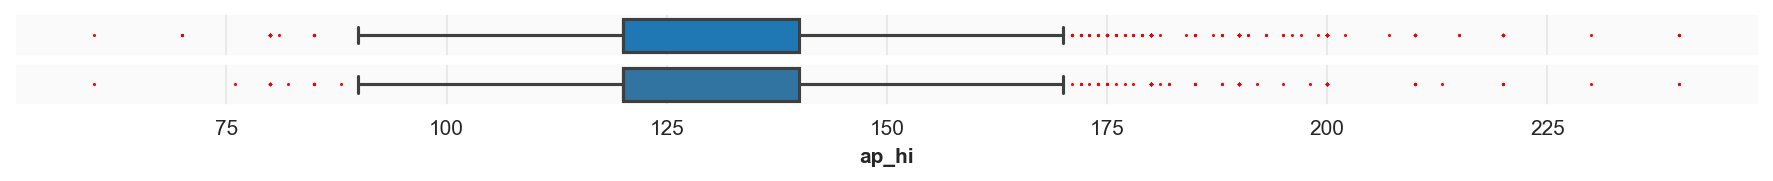

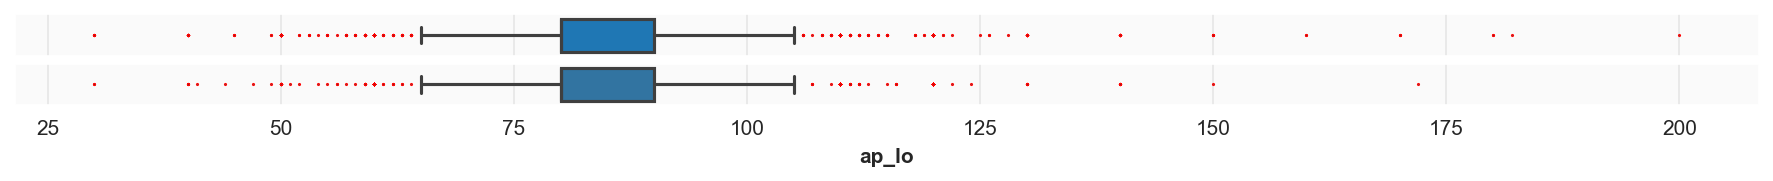

In [61]:
print(f'{CR}Графики разброса для признаков ap_hi и ap_lo{CR}')
for feature in ['ap_hi','ap_lo']:
    fig, ax = plt.subplots(figsize=(15,0.8), dpi=PLOT_DPI, nrows=2, ncols=1, sharex=True)
    sns.boxplot(data=data_train, x=feature, flierprops={'marker':'.','markeredgecolor':'red','markersize':1}, saturation=1, ax=ax[0])
    sns.boxplot(data=data_test, x=feature, flierprops={'marker':'.','markeredgecolor':'red','markersize':1}, ax=ax[1])
    ax[0].set_xlabel('');

> Графики разброса для верхнего и нижнего давления стали намного информативнее.

### Распределения признаков

In [62]:
# временная таблица с числовыми признаками (уместно, если присутствуют и категориальные признаки)

num_fields = data_train.select_dtypes(include=[np.number]).columns.to_list()
df = data_train[num_fields]

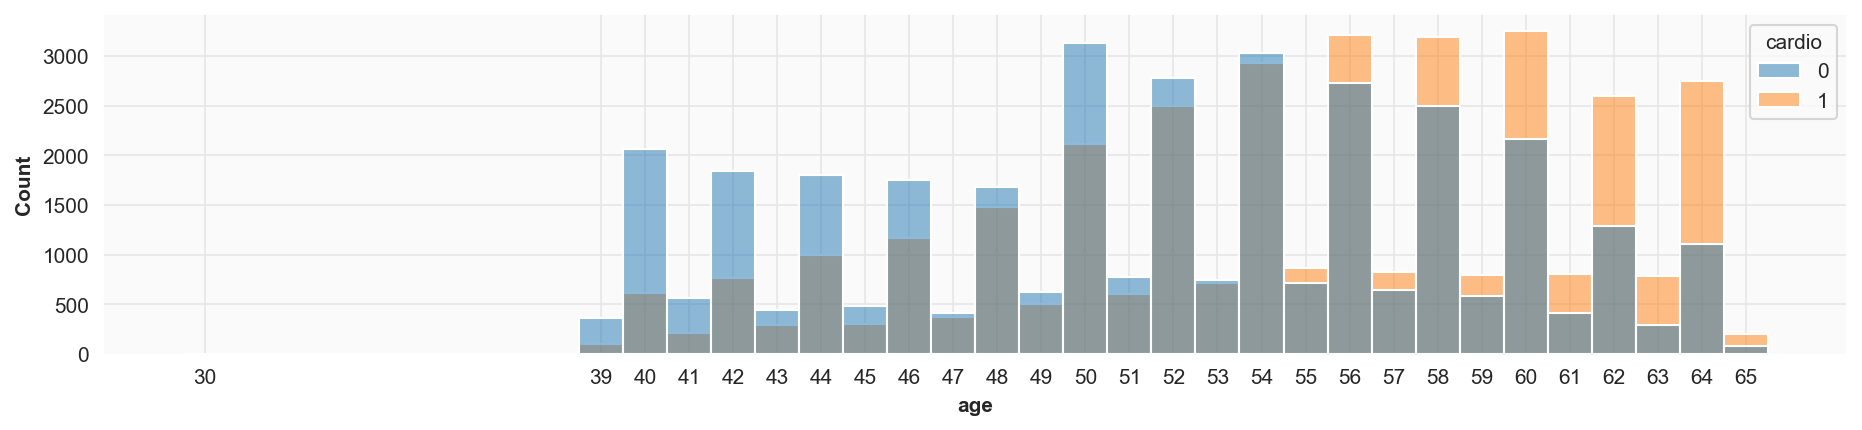

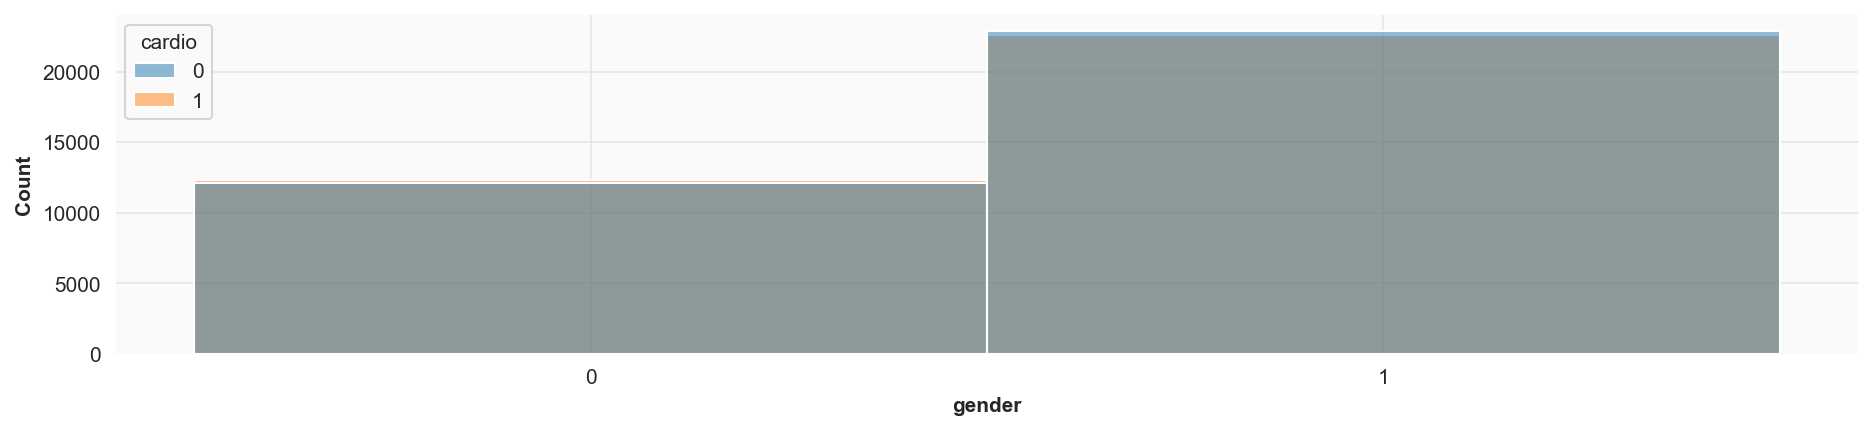

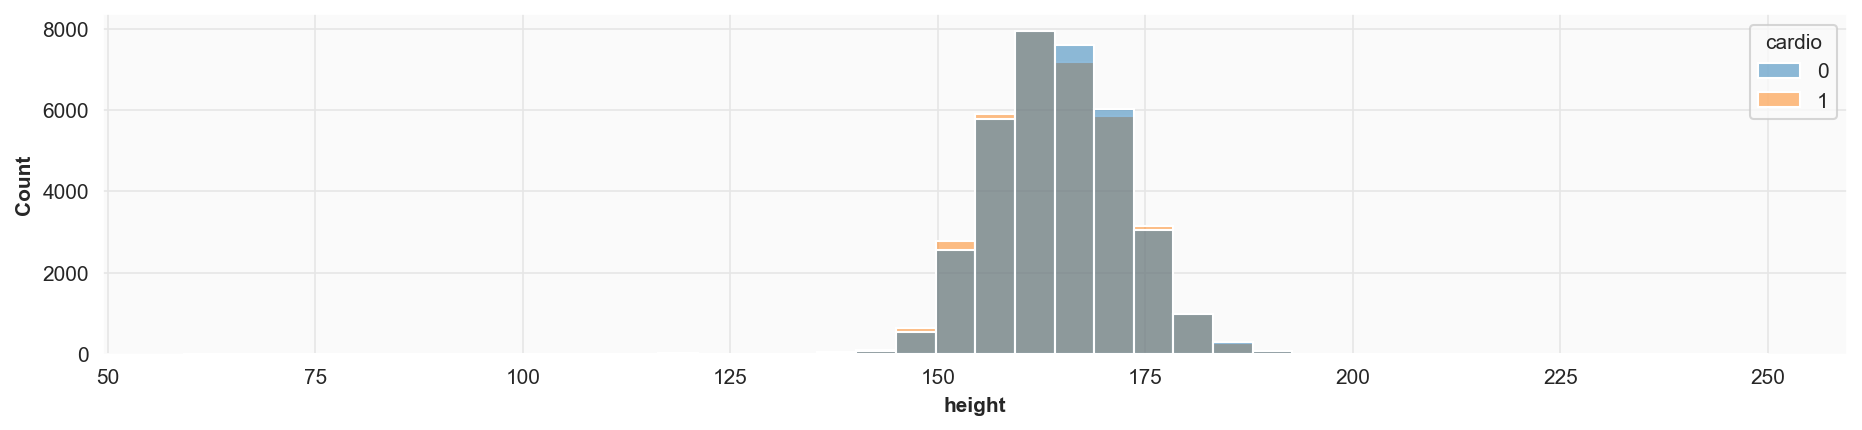

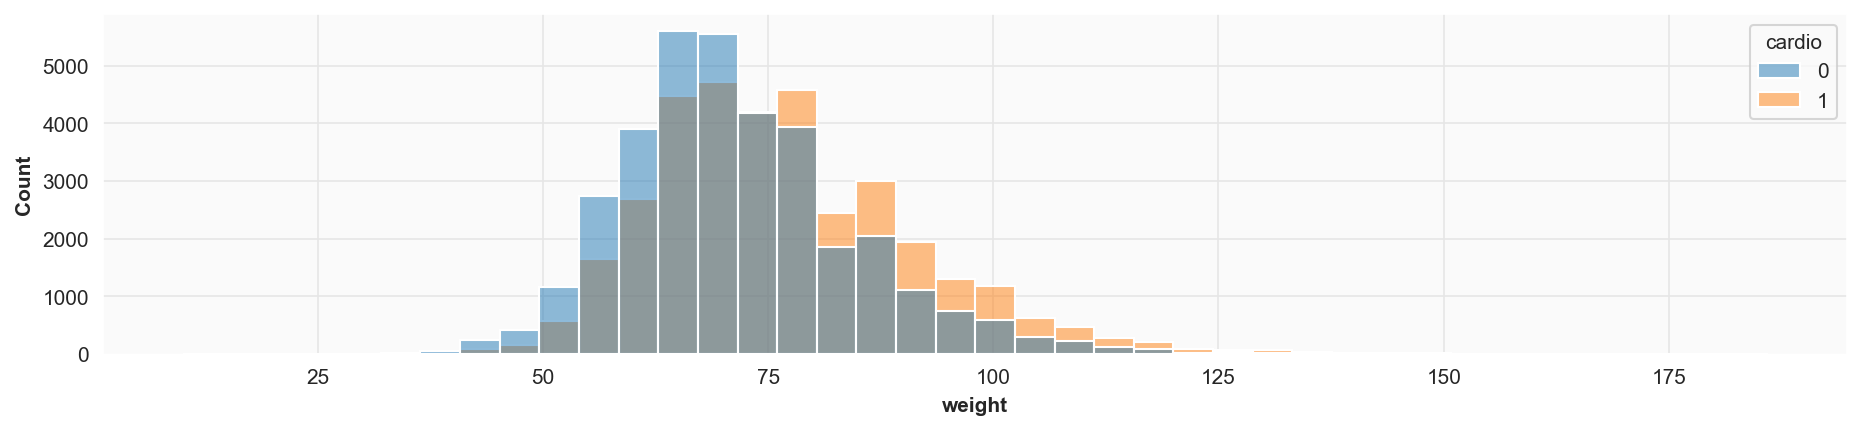

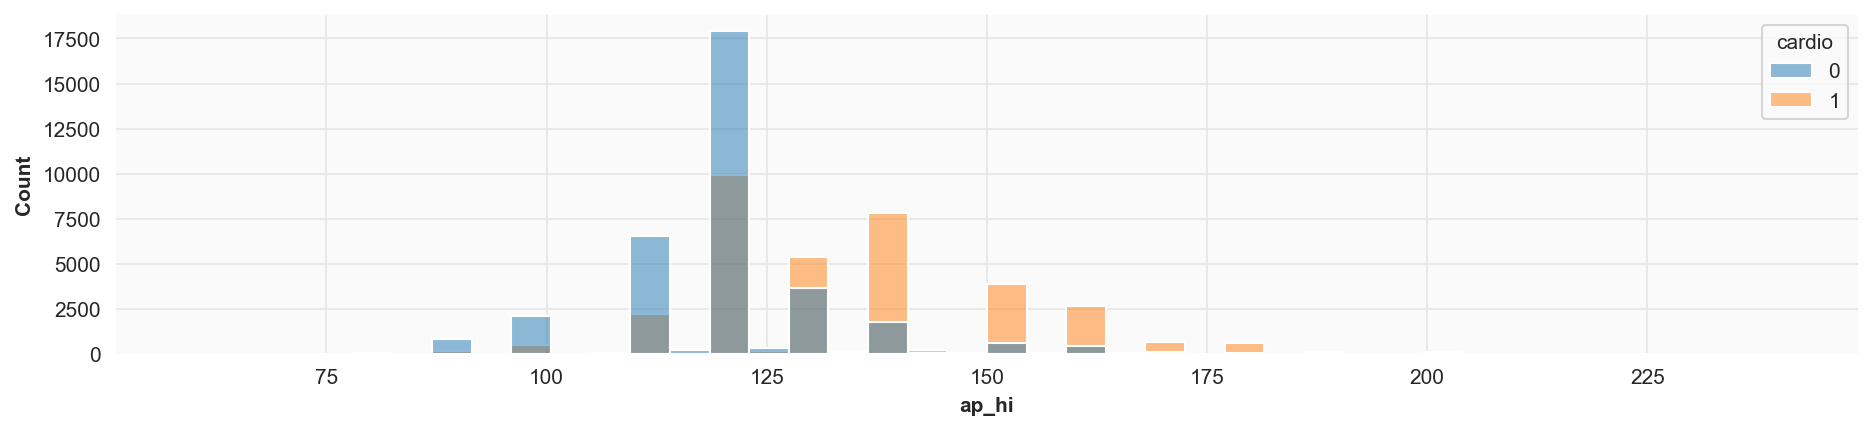

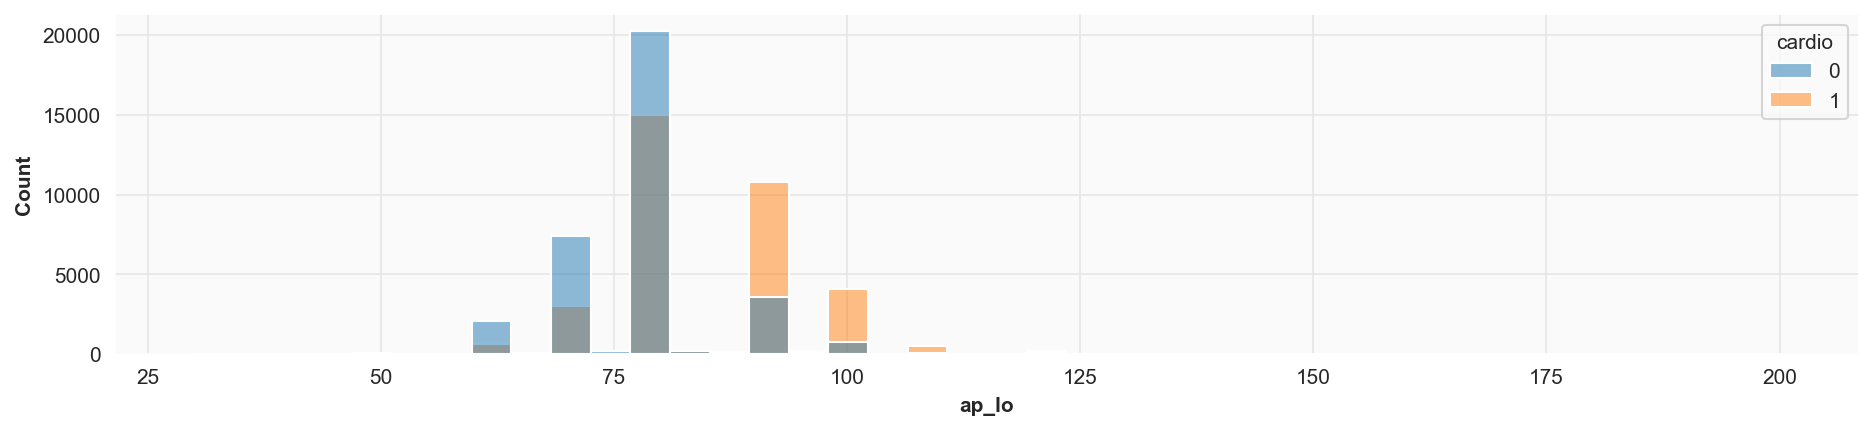

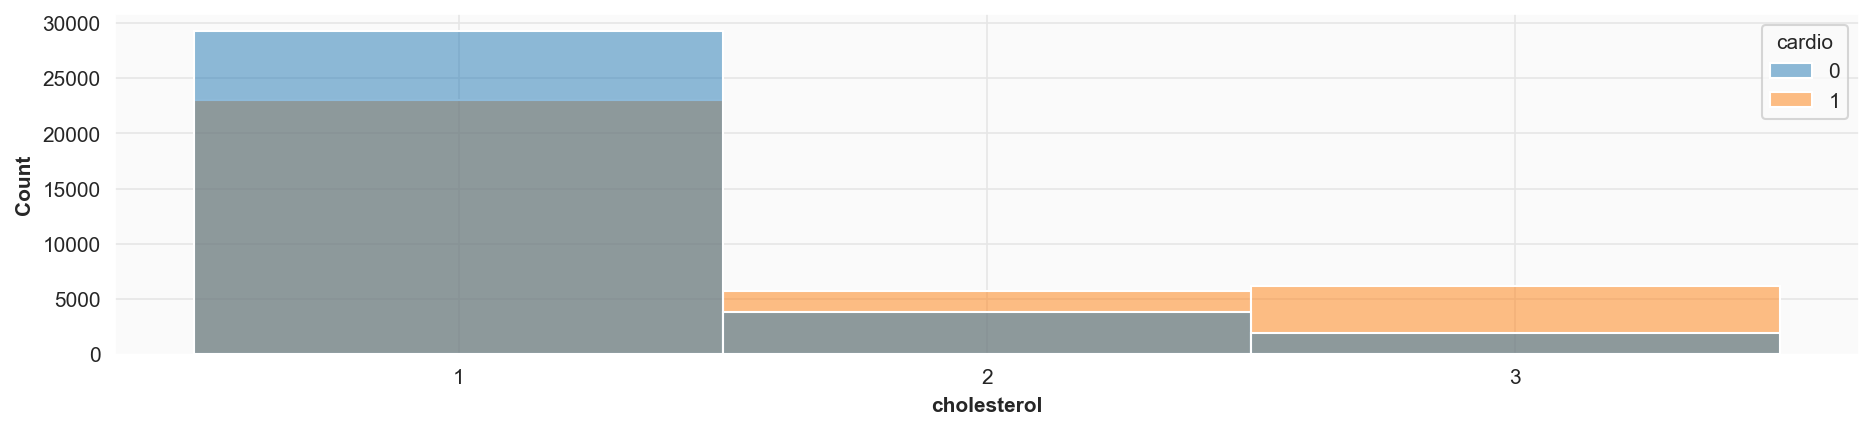

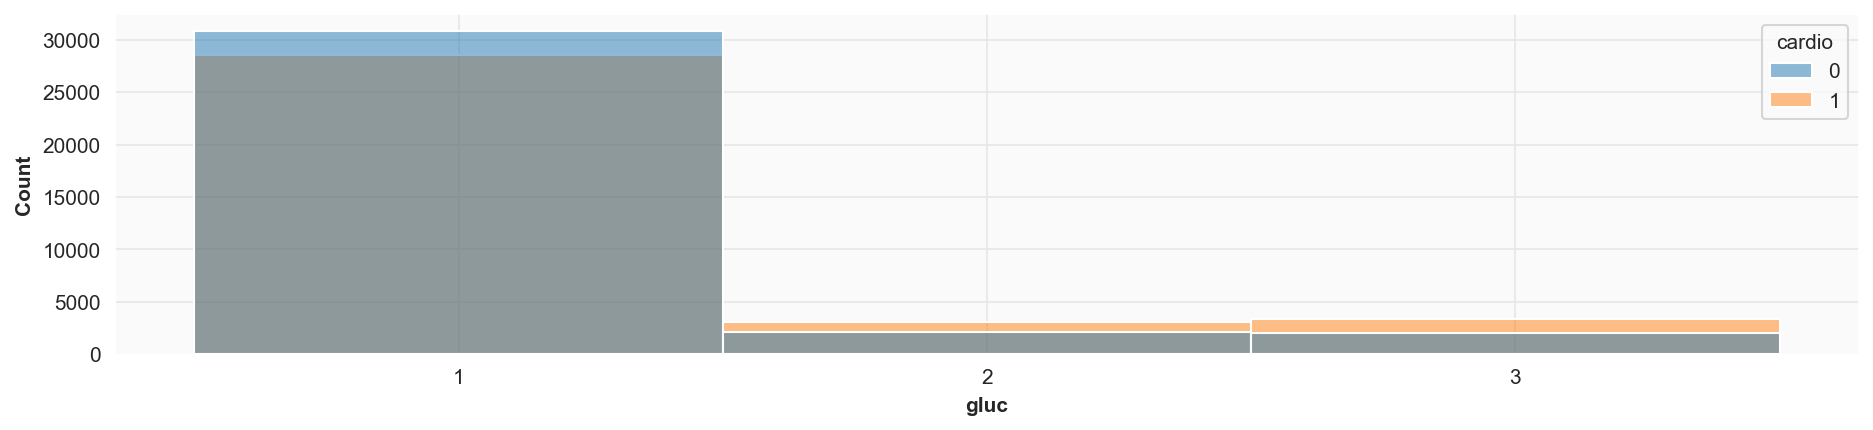

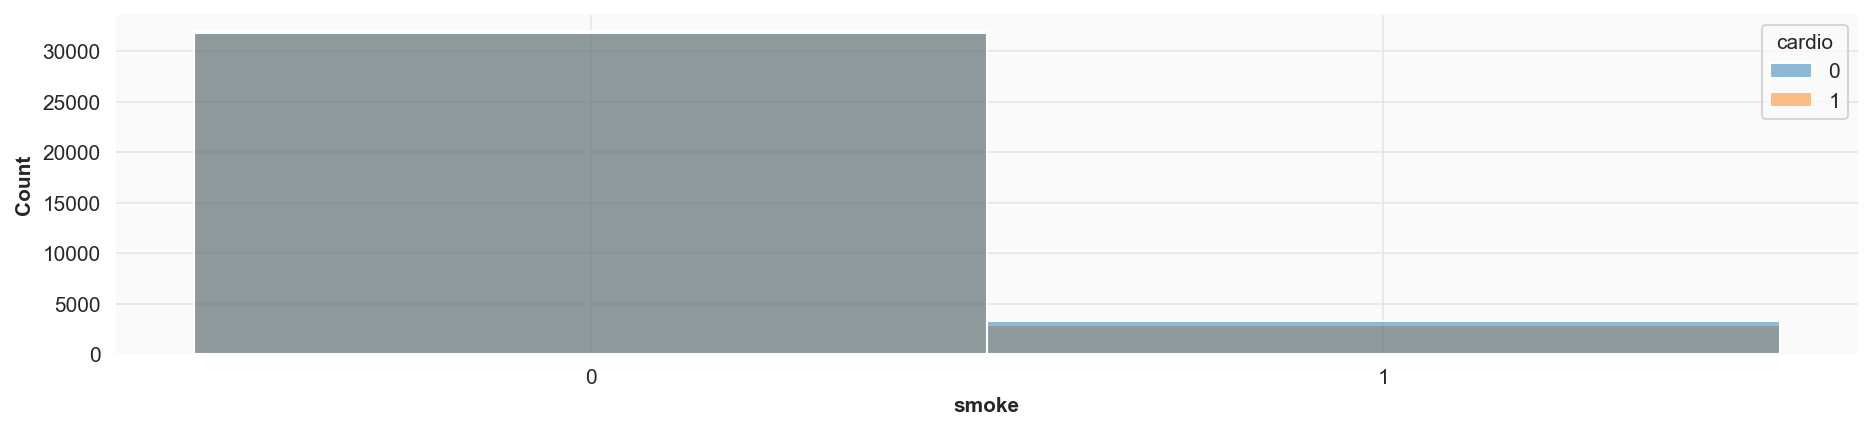

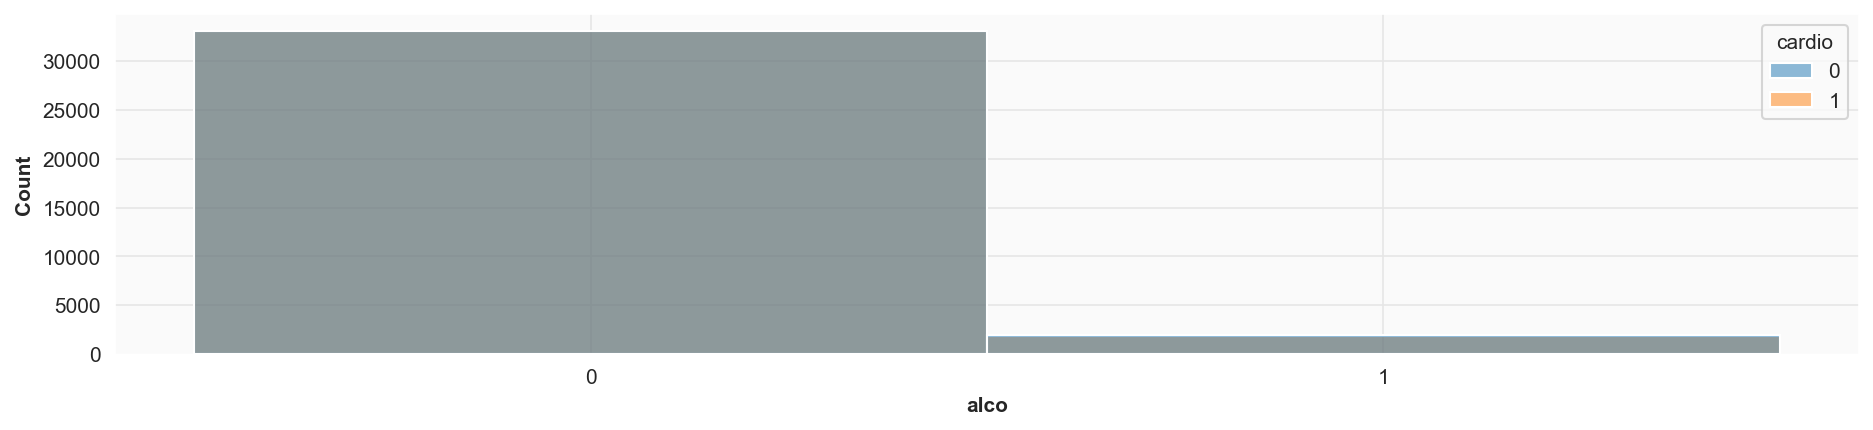

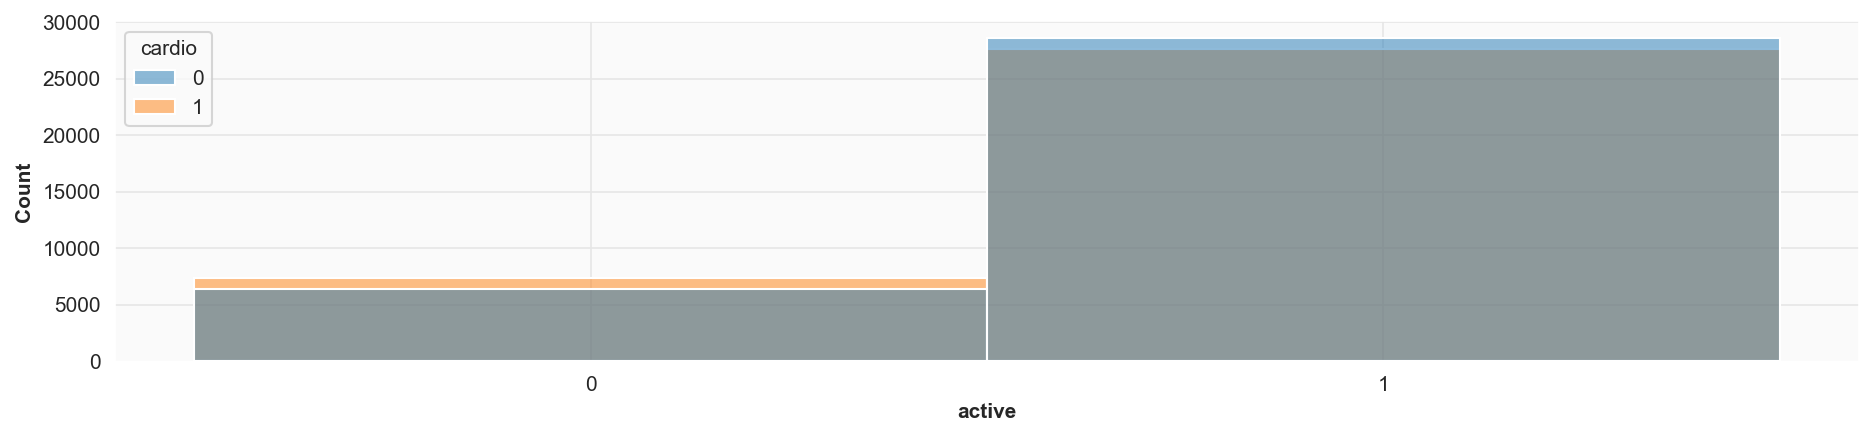

In [63]:
for column in df.drop('cardio', axis=1).columns:
    
    # подбор количества корзин для лучшего восприятия
    bins_treshold = 40
    is_discrete = True if df[column].nunique() < bins_treshold else False
    
    fig, ax = plt.subplots(figsize=(15,3), dpi=PLOT_DPI)
    sns.histplot(x=df[column], hue=df.cardio, bins=40, discrete=is_discrete)
    
    if df[column].nunique() < bins_treshold:
        ax.set_xticks(df[column].unique());

> В чистом виде перспективно выглядят признаки:
> - **age**;
> - **weight**;
> - **ap_hi**;
> - **ap_lo**;
> - **cholesterol**;
> - **gluc**.

### Pair charts

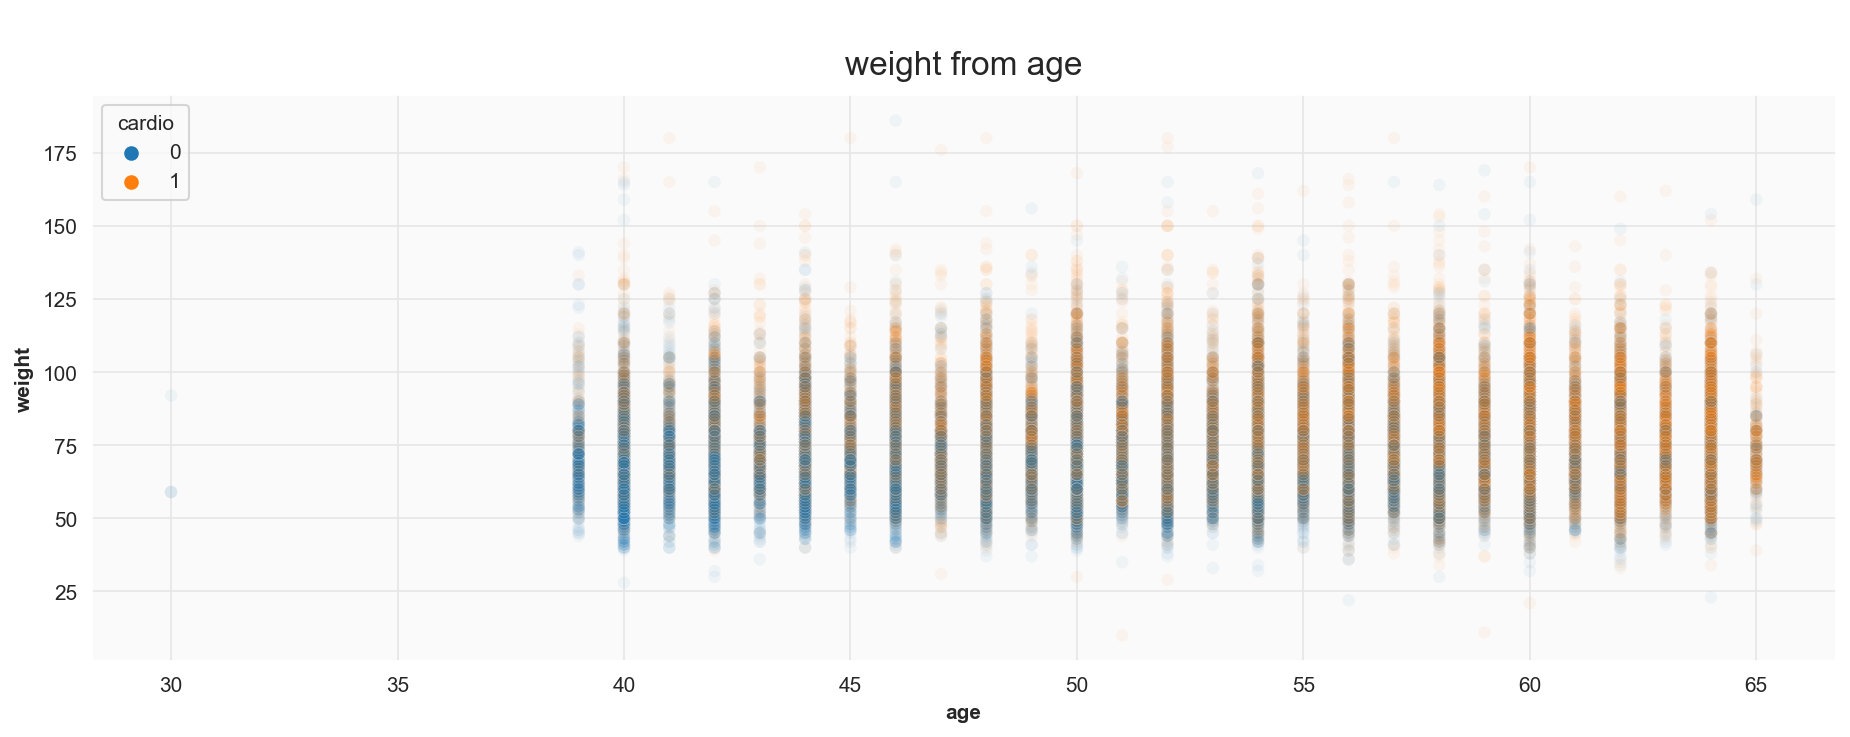

In [64]:
fig, ax = plt.subplots(figsize=(15,5), dpi=PLOT_DPI)
sns.scatterplot(data=data_train, x='age', y='weight', hue='cardio', alpha=0.05)
ax.set_title(f'{CR}weight from age')

plt.show()

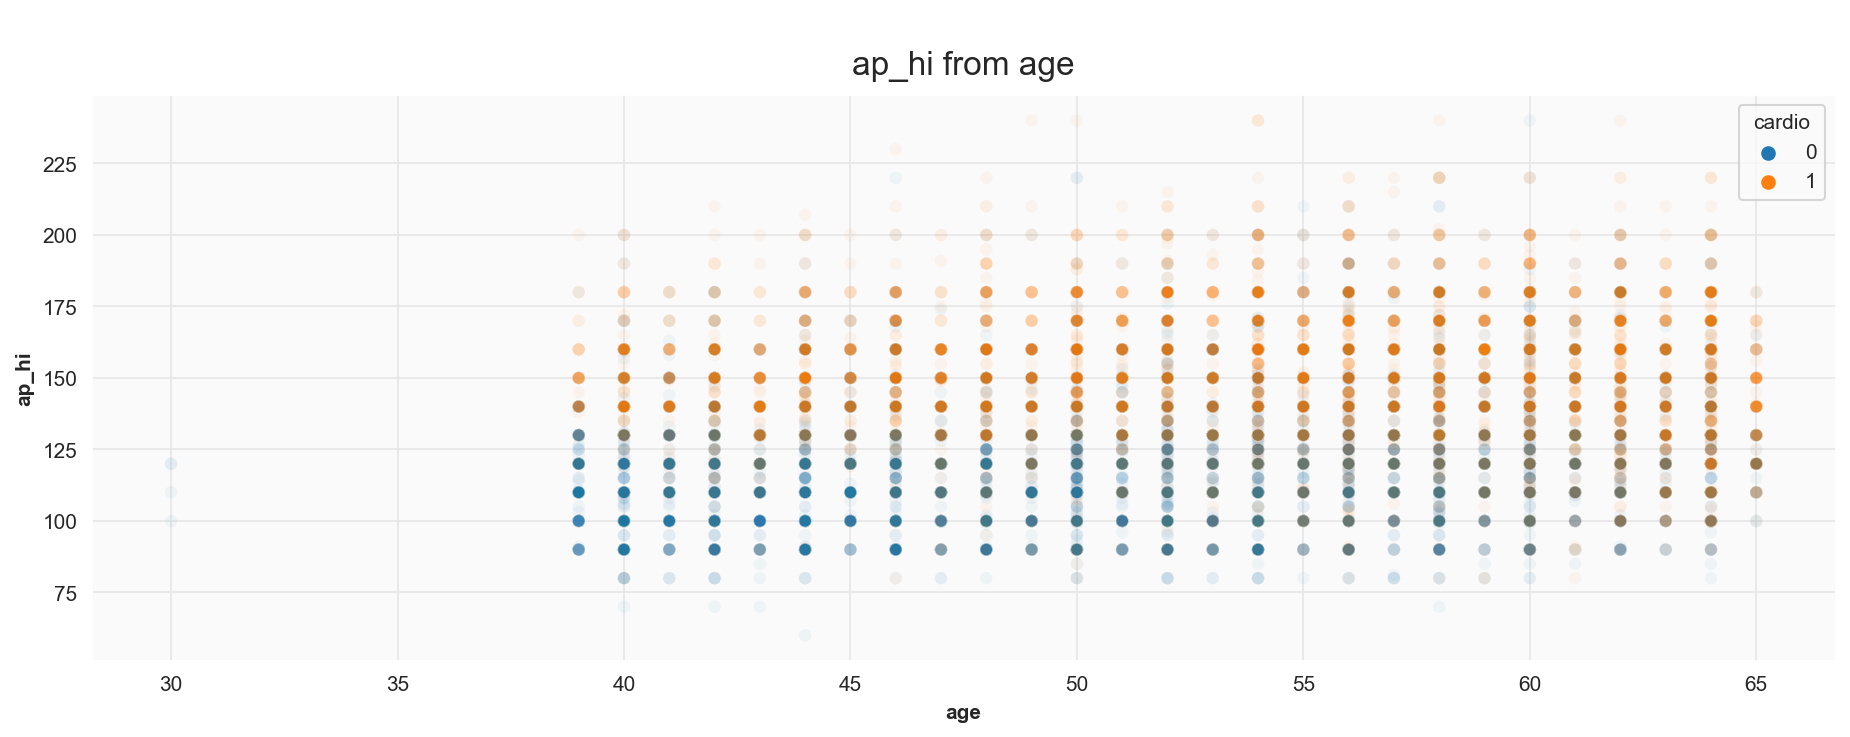

In [65]:
fig, ax = plt.subplots(figsize=(15,5), dpi=PLOT_DPI)
sns.scatterplot(data=data_train, x='age', y='ap_hi', hue='cardio', alpha=0.05)
ax.set_title(f'{CR}ap_hi from age')

plt.show()

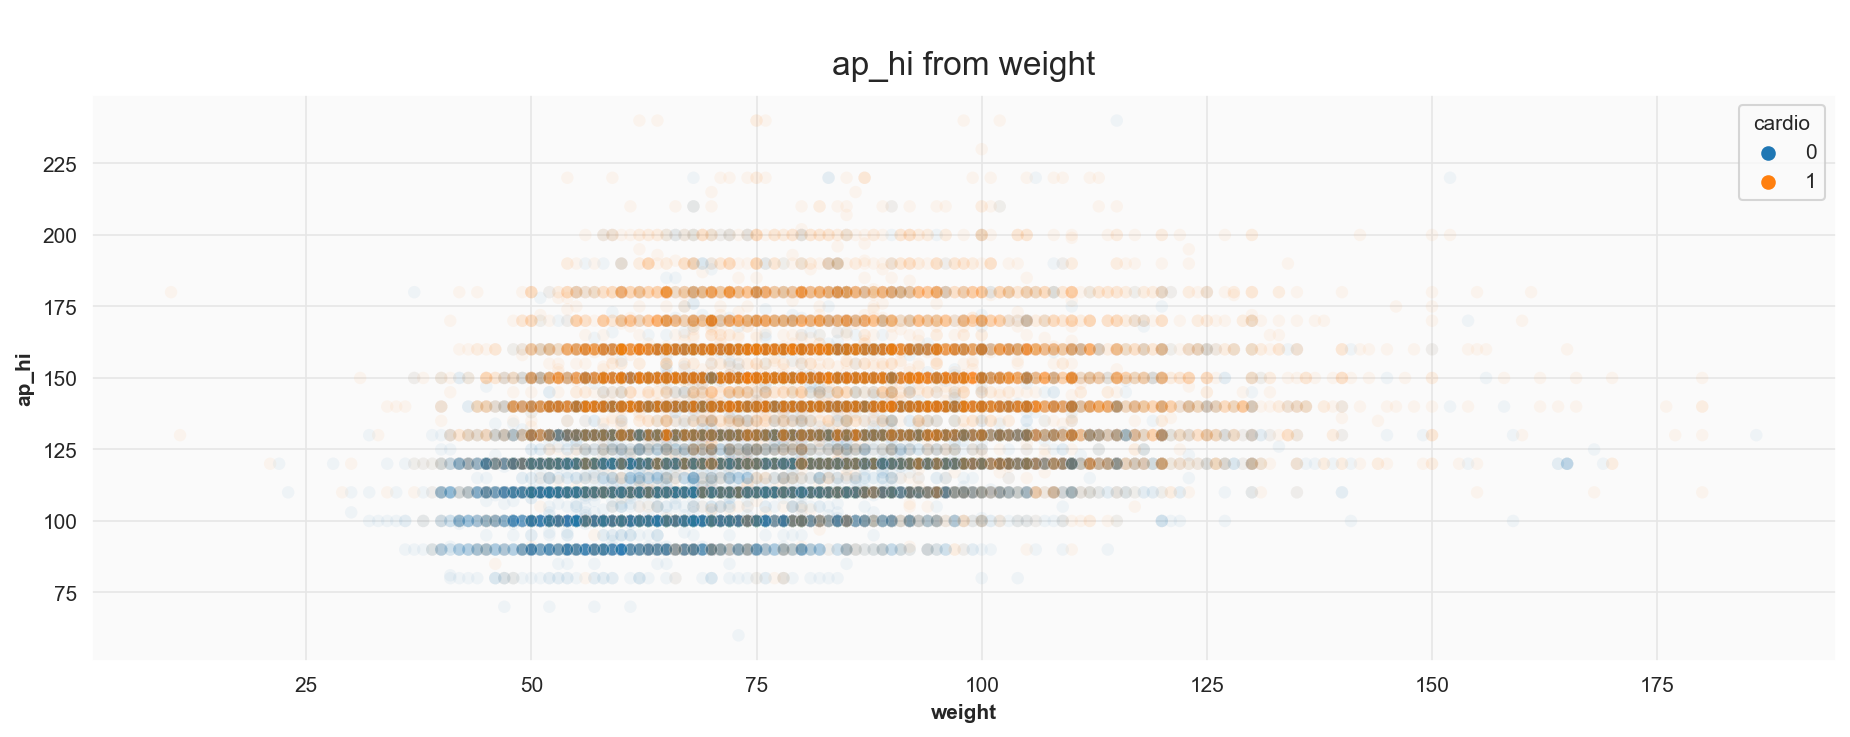

In [66]:
fig, ax = plt.subplots(figsize=(15,5), dpi=PLOT_DPI)
sns.scatterplot(data=data_train, x='weight', y='ap_hi', hue='cardio', alpha=0.05)
ax.set_title(f'{CR}ap_hi from weight')

plt.show()

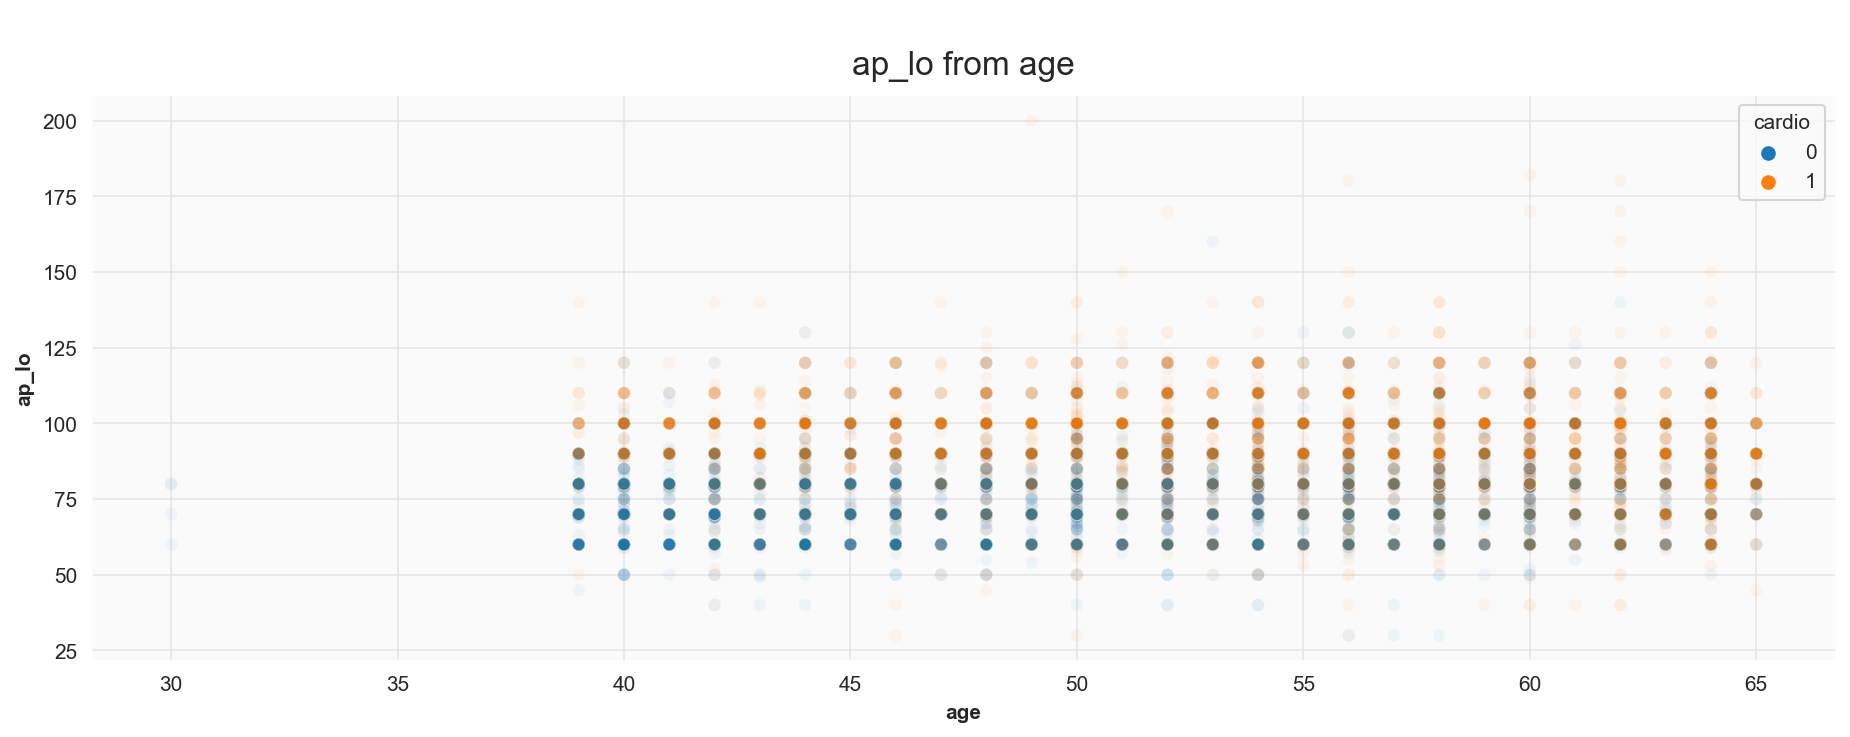

In [67]:
fig, ax = plt.subplots(figsize=(15,5), dpi=PLOT_DPI)
sns.scatterplot(data=data_train, x='age', y='ap_lo', hue='cardio', alpha=0.05)
ax.set_title(f'{CR}ap_lo from age')

plt.show()

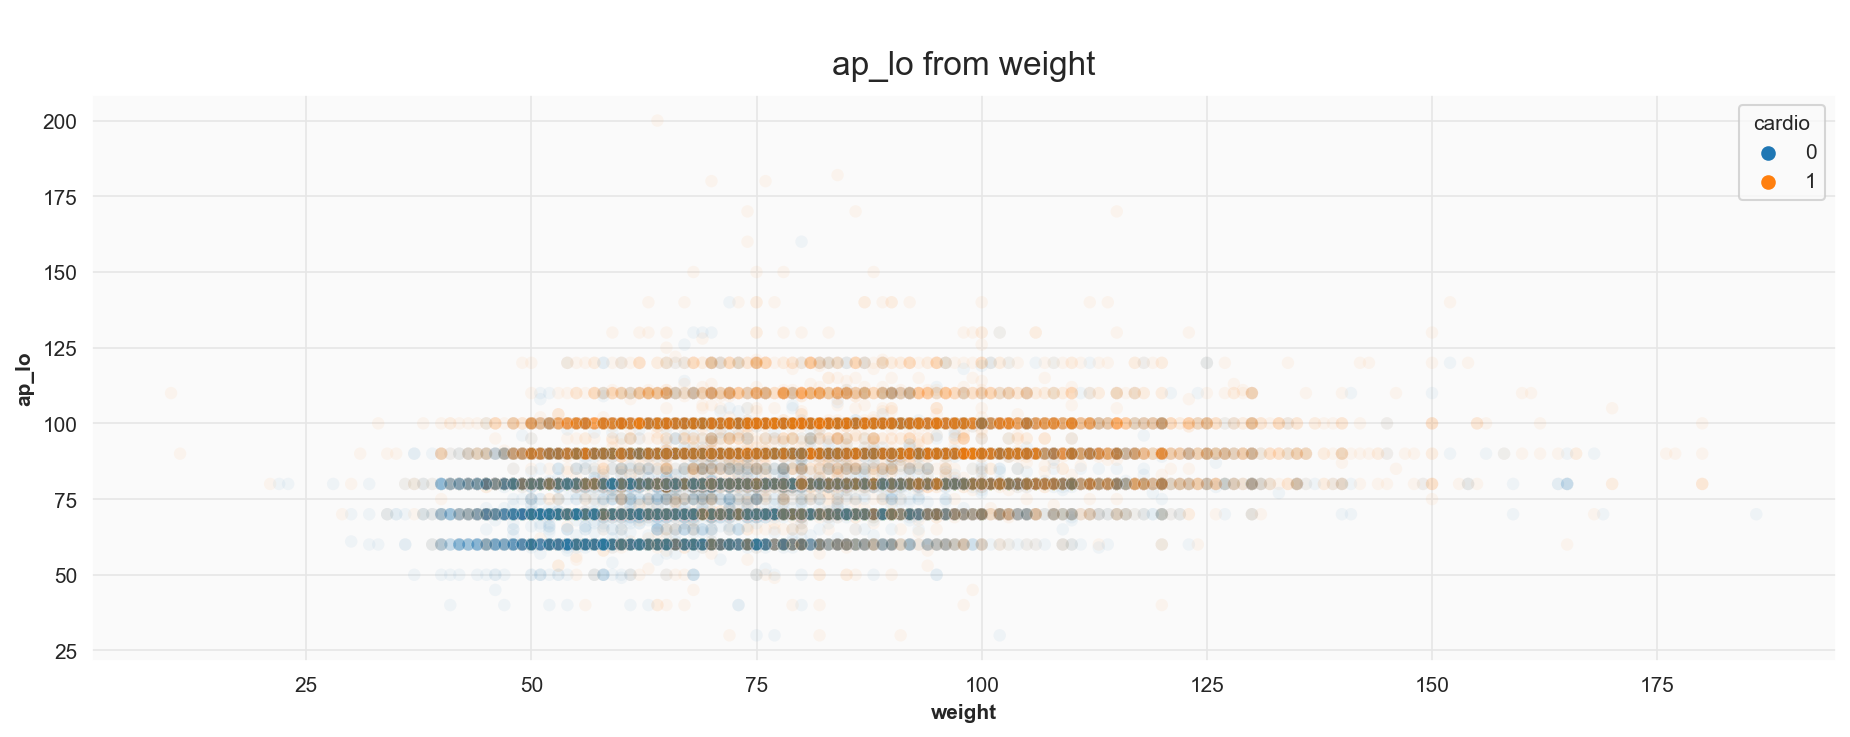

In [68]:
fig, ax = plt.subplots(figsize=(15,5), dpi=PLOT_DPI)
sns.scatterplot(data=data_train, x='weight', y='ap_lo', hue='cardio', alpha=0.05)
ax.set_title(f'{CR}ap_lo from weight')

plt.show()

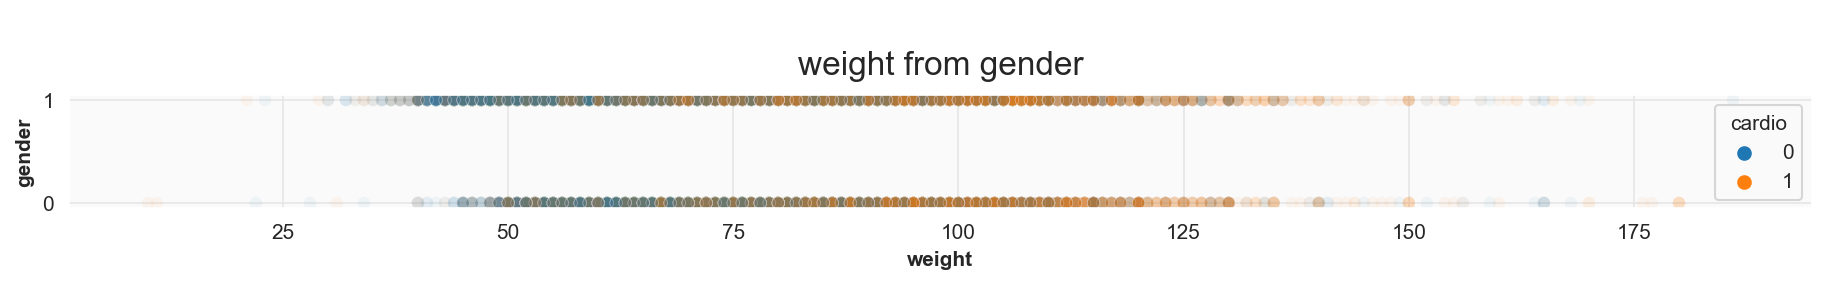

In [69]:
fig, ax = plt.subplots(figsize=(15,1), dpi=PLOT_DPI)
sns.scatterplot(data=data_train, x='weight', y='gender', hue='cardio', alpha=0.05)
ax.set_title(f'{CR}weight from gender')

plt.show()

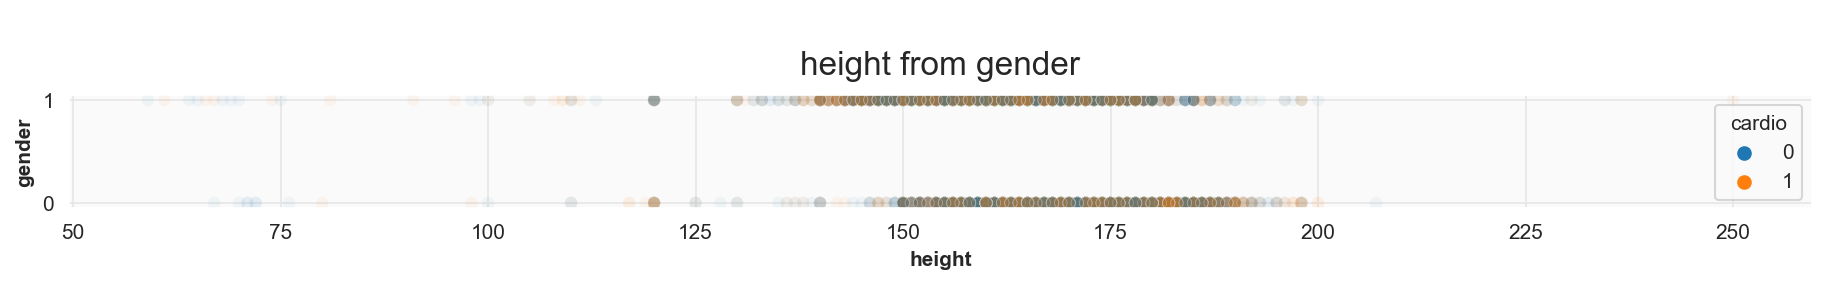

In [70]:
fig, ax = plt.subplots(figsize=(15,1), dpi=PLOT_DPI)
sns.scatterplot(data=data_train, x='height', y='gender', hue='cardio', alpha=0.05)
ax.set_title(f'{CR}height from gender')

plt.show()

---

## Clip, remap, round data

Клиппинг, ремапинг и округление данных для большей обобщающей способности. 

In [71]:
for df in [data_train, data_test]:
    
    df.age = df.age.clip(39,65)
    df.weight = df.weight.clip(40,150)
    df.height = df.height.clip(140,200)
    df.ap_hi = df.ap_hi.clip(70,200)
    df.ap_lo = df.ap_lo.clip(40,130)
    
#     df.gluc = df.gluc.map({1:1,2:2,3:2})    # категории 2 и 3 распределены похоже (и обе малочисленны)
    
    df.ap_hi = df.ap_hi.round(-1)
    df.ap_lo = df.ap_lo.round(-1)

### Повторные графики распределения признаков

In [72]:
# временная таблица с числовыми признаками (уместно, если присутствуют и категориальные признаки)

num_fields = data_train.select_dtypes(include=[np.number]).columns.to_list()
df = data_train[num_fields]

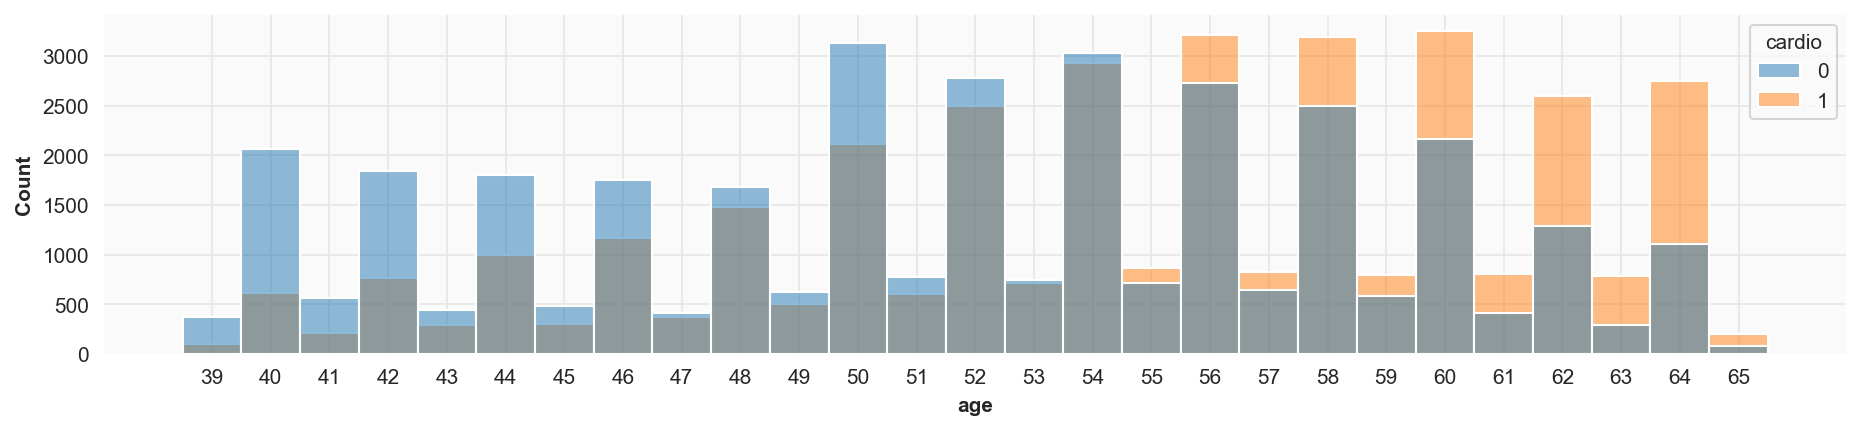

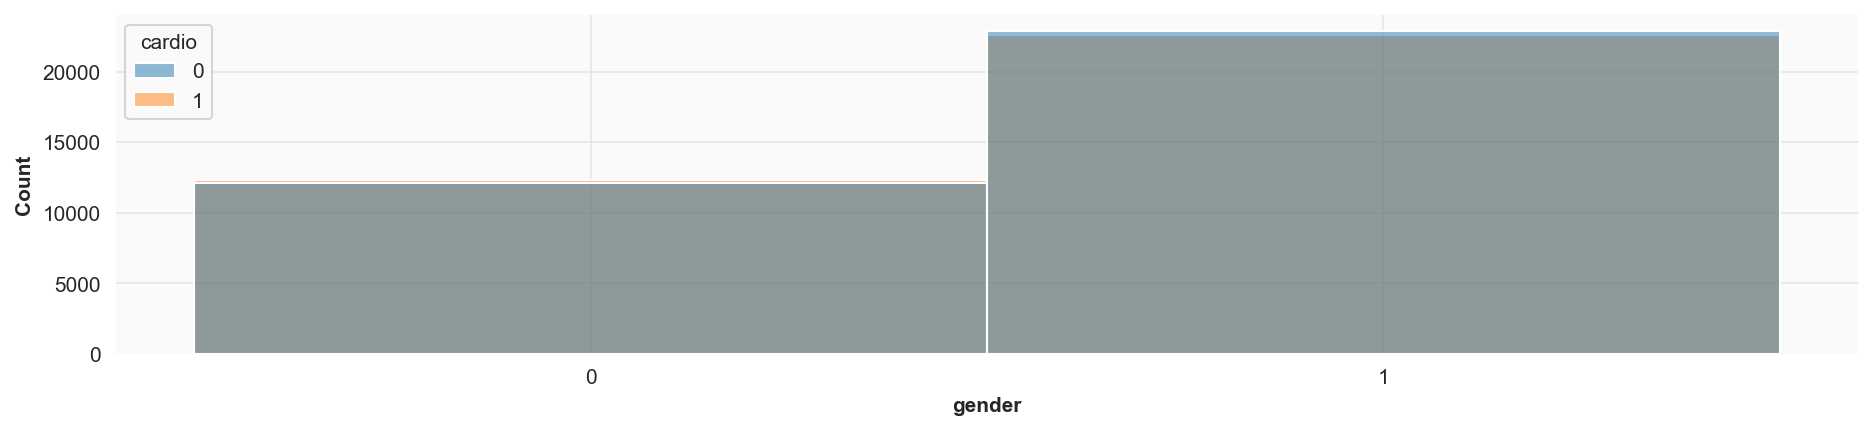

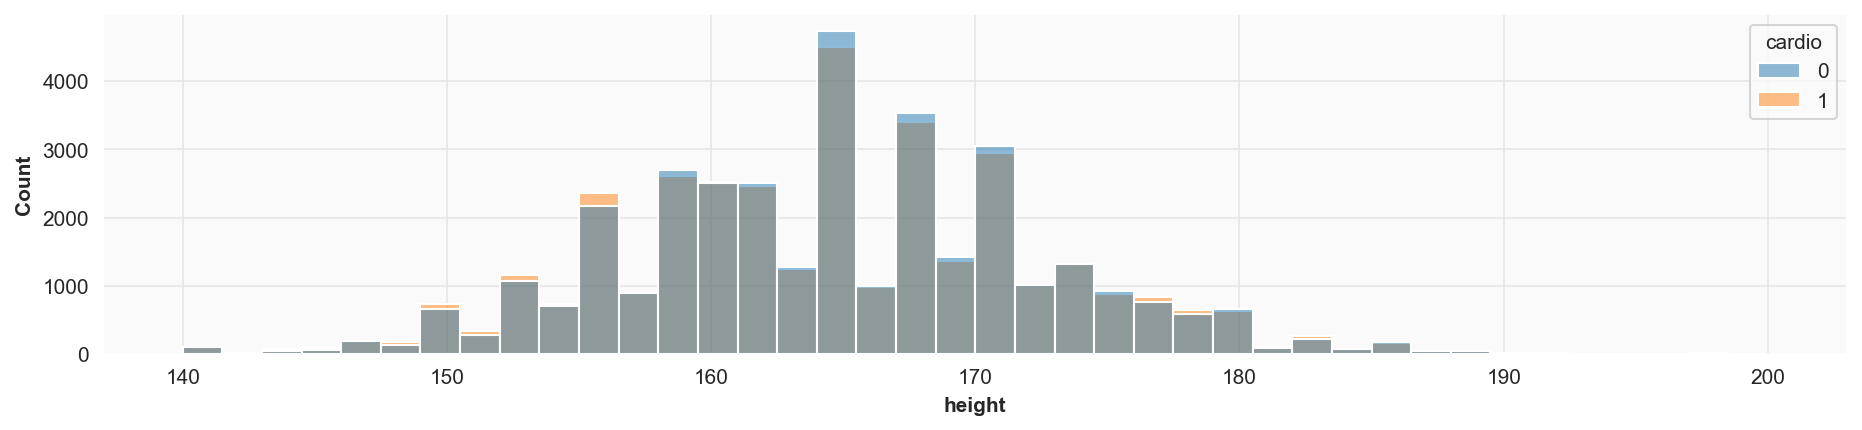

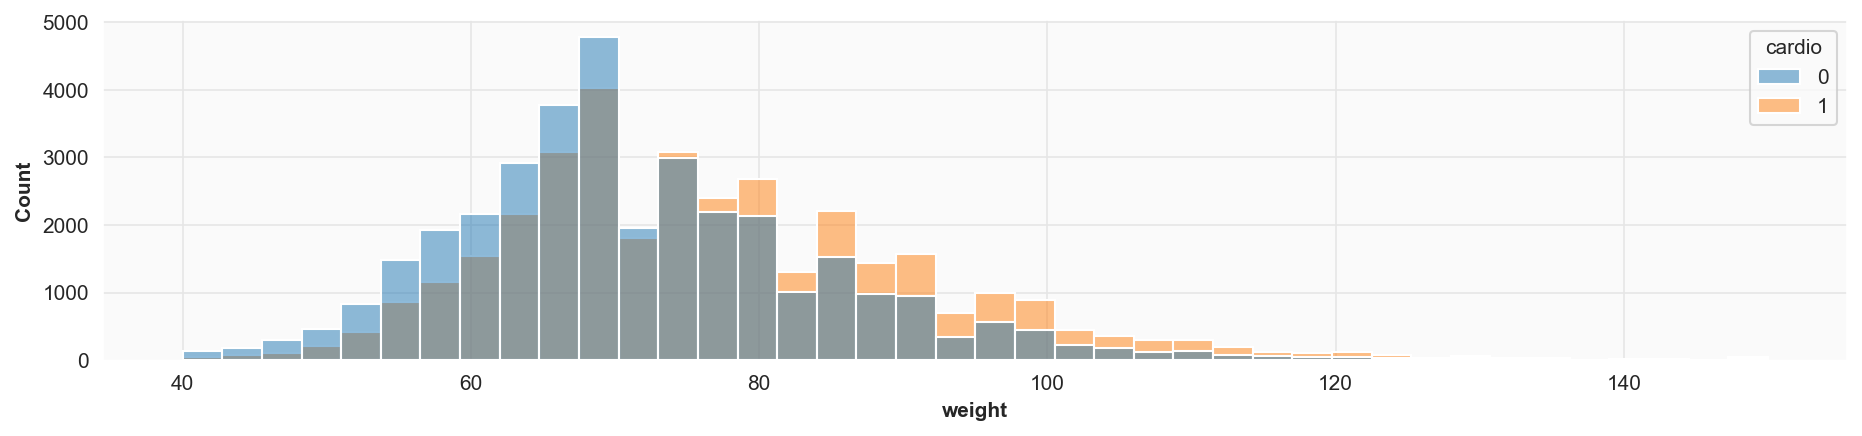

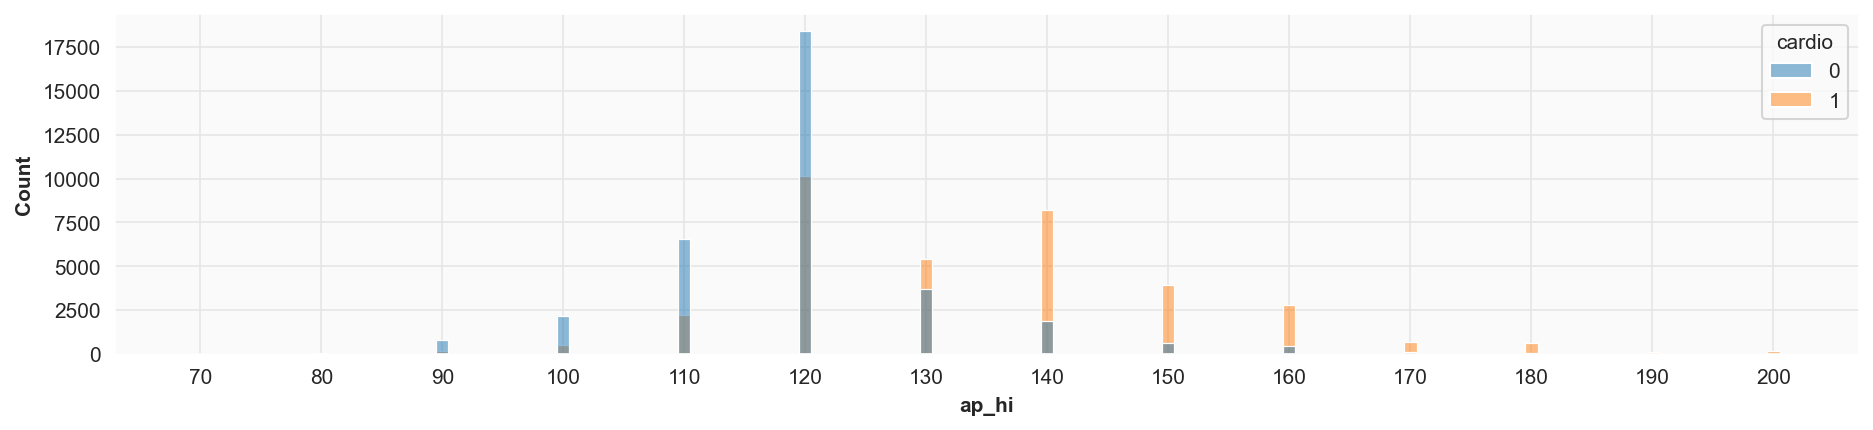

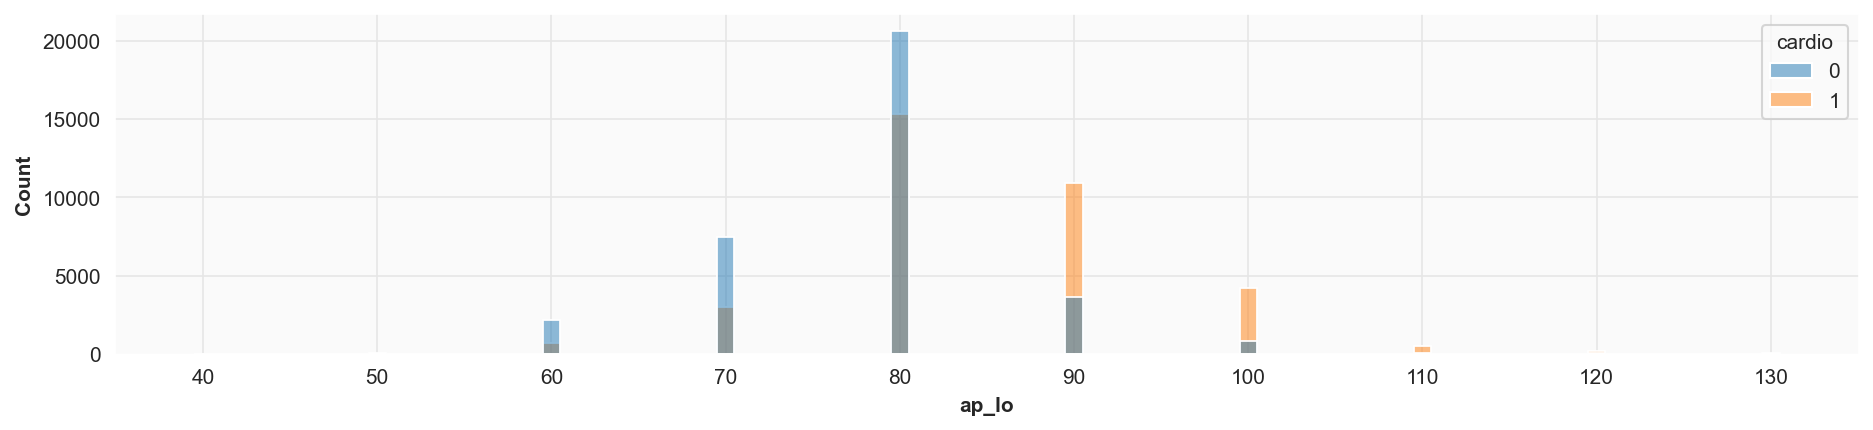

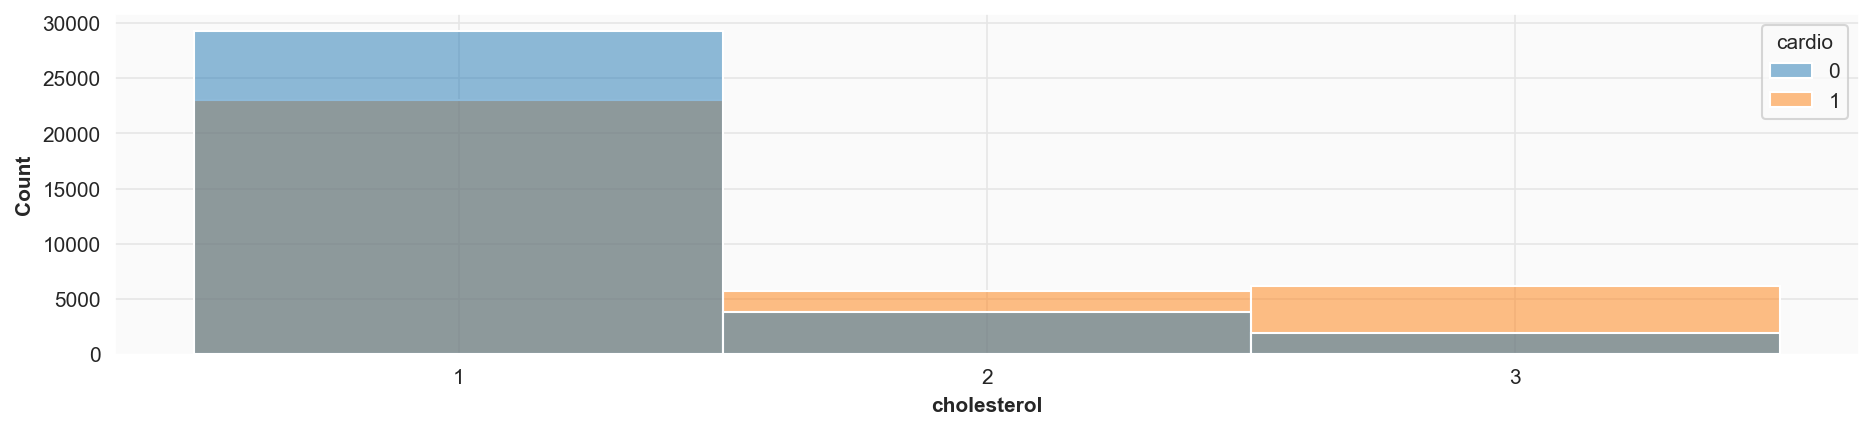

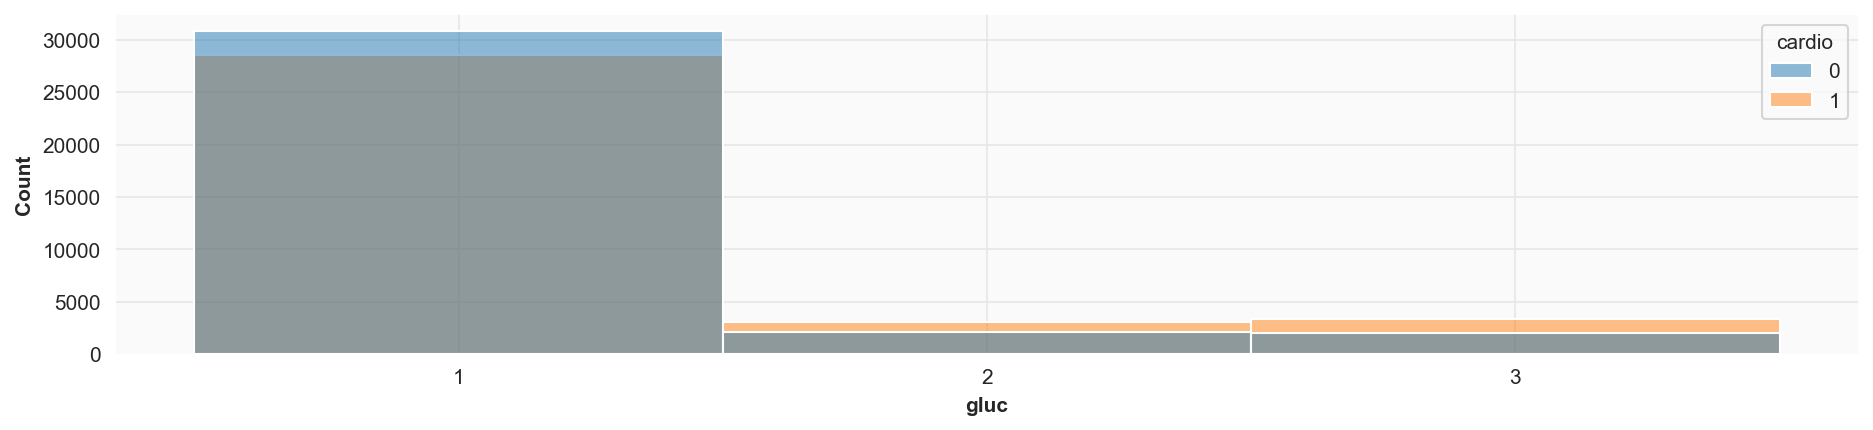

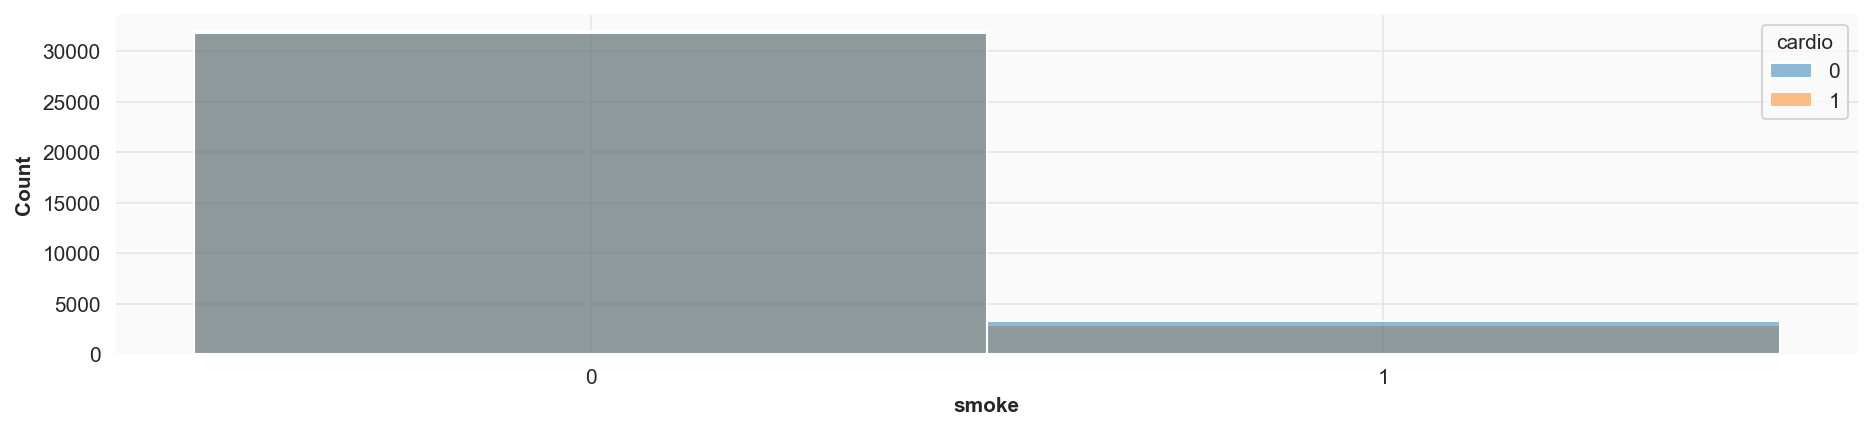

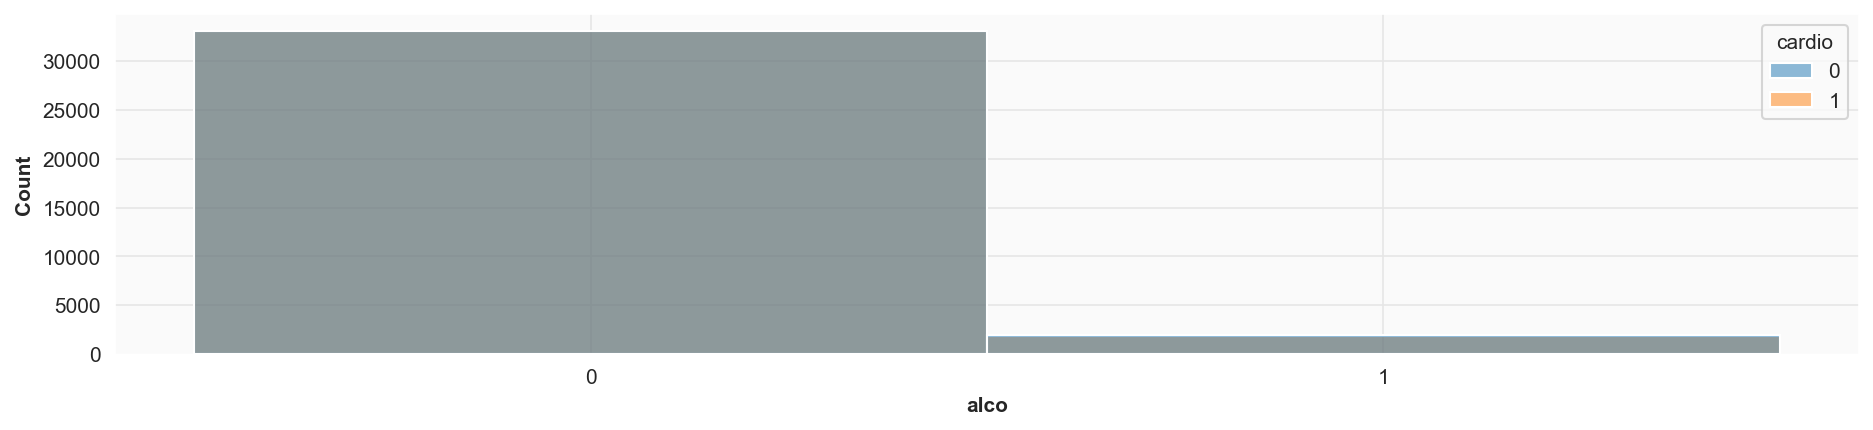

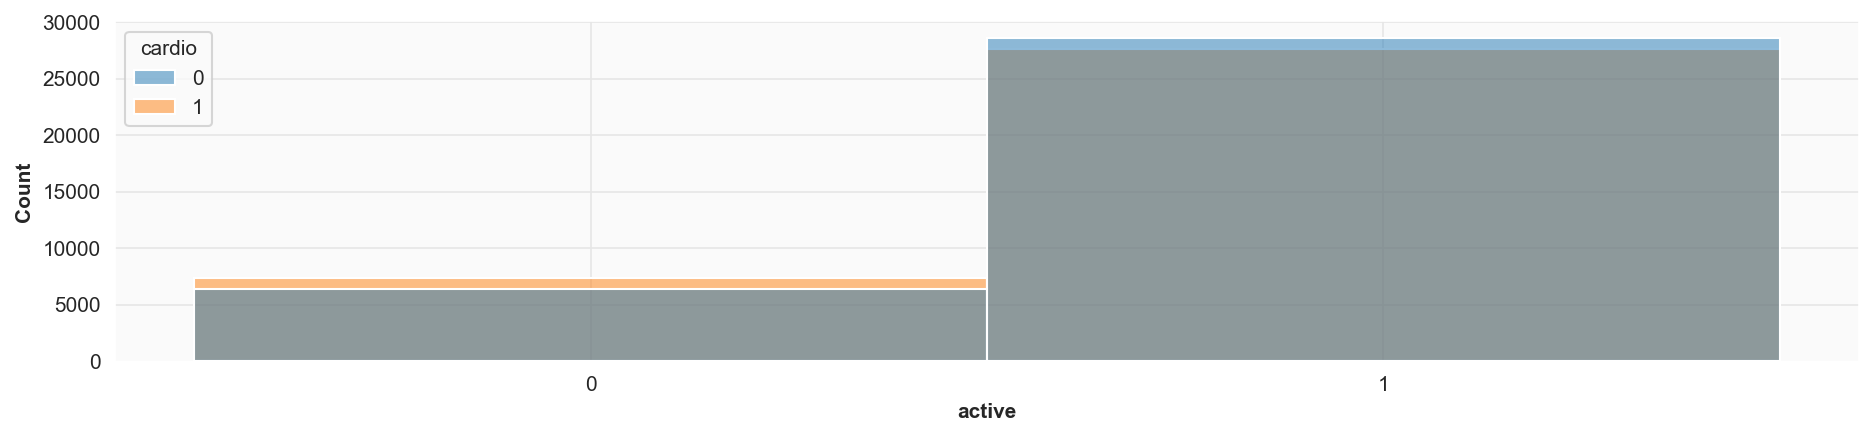

In [73]:
for column in df.drop('cardio', axis=1).columns:
    
    # подбор количества корзин для лучшего восприятия
    bins_treshold = 40
    is_discrete = True if df[column].nunique() < bins_treshold else False
    
    fig, ax = plt.subplots(figsize=(15,3), dpi=PLOT_DPI)
    sns.histplot(x=df[column], hue=df.cardio, bins=40, discrete=is_discrete)
    
    if df[column].nunique() < bins_treshold:
        ax.set_xticks(df[column].unique());

---

### Повторные pair charts

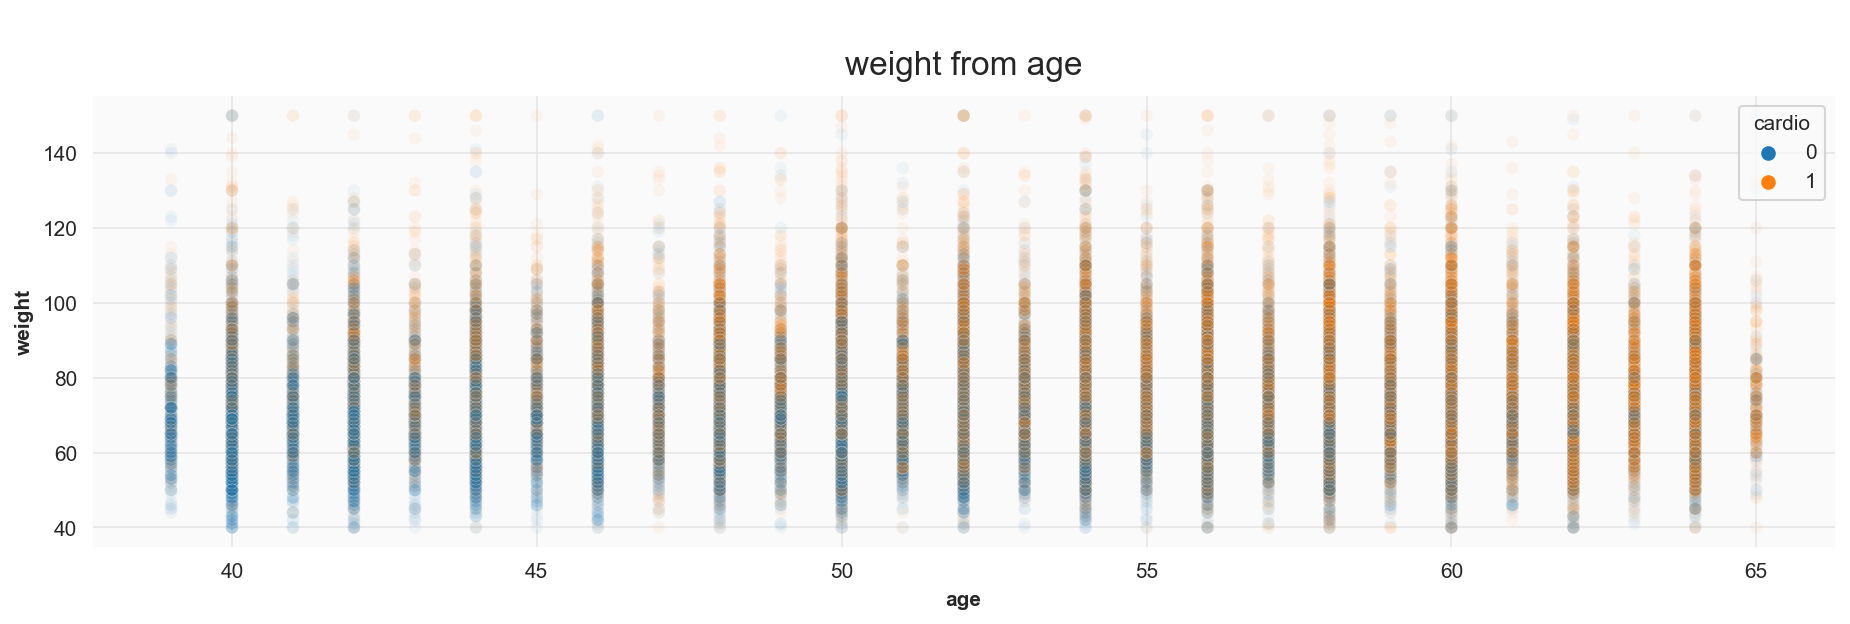

In [74]:
fig, ax = plt.subplots(figsize=(15,4), dpi=PLOT_DPI)
sns.scatterplot(data=data_train, x='age', y='weight', hue='cardio', alpha=0.05)
ax.set_title(f'{CR}weight from age')

plt.show()

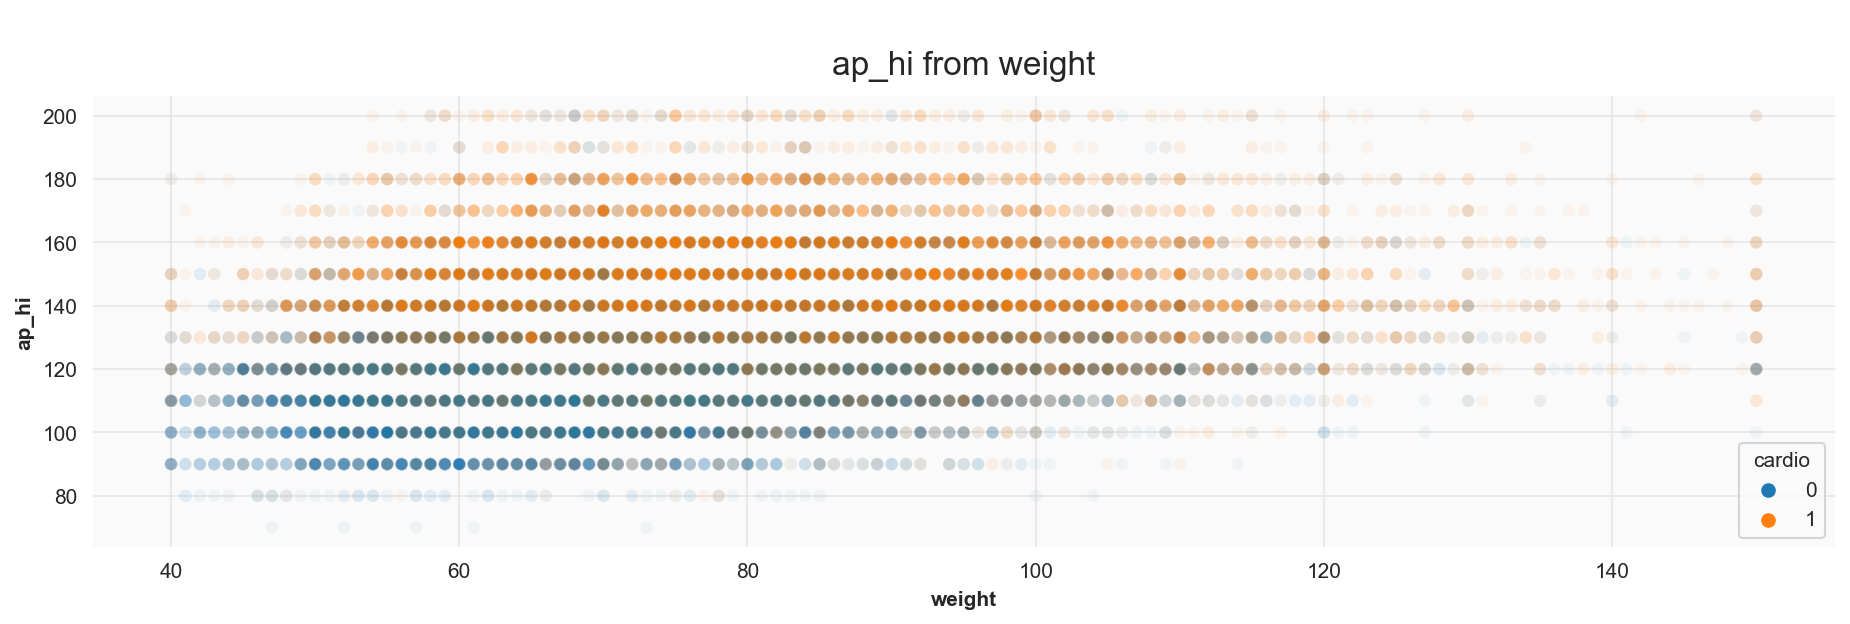

In [75]:
fig, ax = plt.subplots(figsize=(15,4), dpi=PLOT_DPI)
sns.scatterplot(data=data_train, x='weight', y='ap_hi', hue='cardio', alpha=0.05)
ax.set_title(f'{CR}ap_hi from weight')

plt.show()

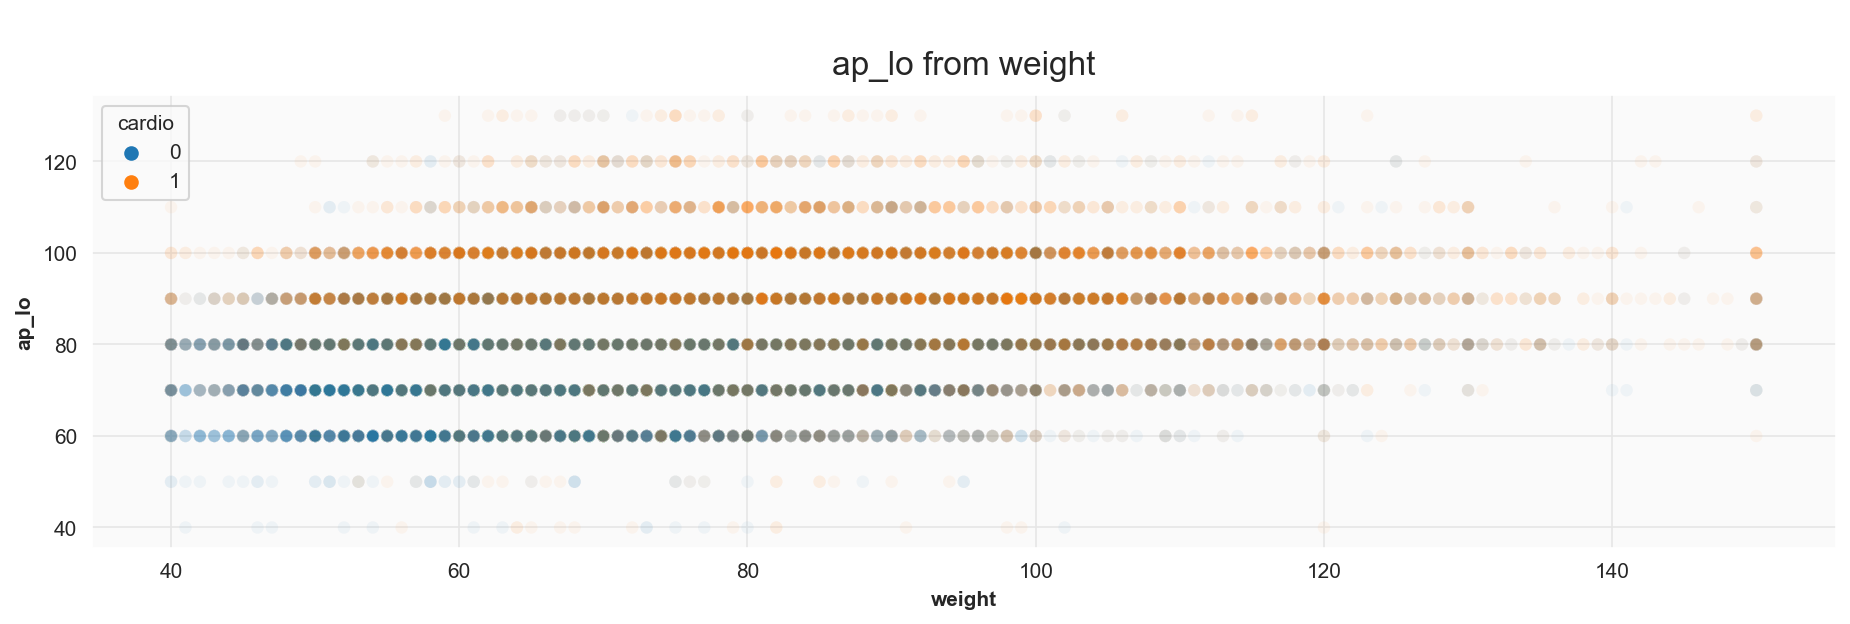

In [76]:
fig, ax = plt.subplots(figsize=(15,4), dpi=PLOT_DPI)
sns.scatterplot(data=data_train, x='weight', y='ap_lo', hue='cardio', alpha=0.05)
ax.set_title(f'{CR}ap_lo from weight')

plt.show()

---

## Save data

Сохранение обработанных данных для следующего этапа.

In [77]:
data_train.to_csv(f'datasets/EDA_train.csv', index=False)
data_test.to_csv(f'datasets/EDA_test.csv', index=False)